<img src="./✩.jpg" alt="EREN" width="98%" />

<h1 style="font-size: 6em; text-align: center;"><span style="color:#D7DBDD">LA POPULARIDAD DEL ANIME</span></h1>

 # <span style="color:#AEB6BF   "> ANALISIS EXPLORATORIO DE DATOS(EDA) DE LA POPULARIDAD DEL ANIME </span>

## <span style="color:#85929E "> TEMA </span>

ANIME. El anime es una forma de expresión artística japonesa que ha ganado popularidad a nivel mundial, ha cautivado a audiencias de todas las edades con sus historias, personajes memorables y estilos visuales. Asi que vamos a realizar un análisis exploratorio de datos para estudiar los factores que contribuyen a la popularidad en el mundo del anime.


### <span style="color:#85929E "> OBJETIVO </span>

El objetivo de este EDA es estudiar lo que resuena con la audiencia y contribuye a la popularidad en el mundo del anime 

## <span style="color:#85929E "> IMPORTACIONES </span> 

In [1011]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option("display.max_columns",None)
from scipy.stats import pearsonr
import statsmodels.api as sm
from scipy.stats import f_oneway
import scipy.stats as stats

## <span style="color:#85929E "> DATASETS Y FUENTES ALTERNATIVAS DE DATOS </span> 

>[KAGGLE](https://www.kaggle.com/datasets)

In [903]:
anime = pd.read_csv("./anime.csv")

## <span style="color:#85929E "> PRIMER ANALISIS </span> 

In [904]:
anime.head() 

,anime_id,Name,Score,Genres,English name,Japanese name,sypnopsis,Type,Episodes,Aired,Premiered,Producers,Licensors,Studios,Source,Duration,Rating,Ranked,Popularity,Members,Favorites,Watching,Completed,On-Hold,Dropped
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,カウボーイビバップ,"In the year 2071, humanity has colonized sever...",TV,26,"Apr 3, 1998 to Apr 24, 1999",Spring 1998,Bandai Visual,"Funimation, Bandai Entertainment",Sunrise,Original,24 min. per ep.,R - 17+ (violence & profanity),28.0,39,1251960,61971,105808,718161,71513,26678
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Cowboy Bebop:The Movie,カウボーイビバップ 天国の扉,"other day, another bounty—such is the life of ...",Movie,1,"Sep 1, 2001",Unknown,"Sunrise, Bandai Visual",Sony Pictures Entertainment,Bones,Original,1 hr. 55 min.,R - 17+ (violence & profanity),159.0,518,273145,1174,4143,208333,1935,770
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",Trigun,トライガン,"Vash the Stampede is the man with a $$60,000,0...",TV,26,"Apr 1, 1998 to Sep 30, 1998",Spring 1998,Victor Entertainment,"Funimation, Geneon Entertainment USA",Madhouse,Manga,24 min. per ep.,PG-13 - Teens 13 or older,266.0,201,558913,12944,29113,343492,25465,13925
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),ches are individuals with special powers like ...,TV,26,"Jul 2, 2002 to Dec 24, 2002",Summer 2002,"TV Tokyo, Bandai Visual, Dentsu, Victor Entert...","Funimation, Bandai Entertainment",Sunrise,Original,25 min. per ep.,PG-13 - Teens 13 or older,2481.0,1467,94683,587,4300,46165,5121,5378
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",Beet the Vandel Buster,冒険王ビィト,It is the dark century and the people are suff...,TV,52,"Sep 30, 2004 to Sep 29, 2005",Fall 2004,"TV Tokyo, Dentsu",Unknown,Toei Animation,Manga,23 min. per ep.,PG - Children,3710.0,4369,13224,18,642,7314,766,1108


In [905]:
anime.tail()

,anime_id,Name,Score,Genres,English name,Japanese name,sypnopsis,Type,Episodes,Aired,Premiered,Producers,Licensors,Studios,Source,Duration,Rating,Ranked,Popularity,Members,Favorites,Watching,Completed,On-Hold,Dropped
14947,48481,Daomu Biji Zhi Qinling Shen Shu,6.51,"Adventure, Mystery, Supernatural",Unknown,盗墓笔记之秦岭神树,No synopsis information has been added to this...,ONA,Unknown,"Apr 4, 2021 to ?",Unknown,Unknown,Unknown,Unknown,Novel,Unknown,Unknown,NaN,13116,354,6,0,0,0,0
14948,48483,Mieruko-chan,6.51,"Comedy, Horror, Supernatural",Unknown,見える子ちゃん,ko is a typical high school student whose life...,TV,Unknown,2021 to ?,Unknown,Kadokawa,Unknown,Passione,Manga,Unknown,Unknown,NaN,17562,7010,70,14,0,14,0
14949,48488,Higurashi no Naku Koro ni Sotsu,6.51,"Mystery, Dementia, Horror, Psychological, Supe...",Higurashi:When They Cry – SOTSU,ひぐらしのなく頃に卒,Sequel to Higurashi no Naku Koro ni Gou .,TV,Unknown,"Jul, 2021 to ?",Summer 2021,Unknown,Unknown,Unknown,Visual novel,Unknown,R - 17+ (violence & profanity),NaN,17558,11309,48,3,0,0,0
14950,48491,Yama no Susume: Next Summit,6.51,"Adventure, Slice of Life, Comedy",Unknown,ヤマノススメ Next Summit,New Yama no Susume anime.,TV,Unknown,Unknown,Unknown,Kadokawa,Unknown,8bit,Manga,Unknown,PG-13 - Teens 13 or older,NaN,17565,1386,2,13,2,2,1
14951,48492,Scarlet Nexus,6.51,"Action, Fantasy",Unknown,SCARLET NEXUS,Solar calendar year 2020: grotesque organisms ...,TV,Unknown,"Jul, 2021 to ?",Summer 2021,Bandai Namco Arts,Unknown,Sunrise,Game,Unknown,Unknown,NaN,17563,310,0,4,0,1,1


In [906]:
#VER LA INFORMACION DE LA BASE DE DATOS INICIAL
anime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14952 entries, 0 to 14951
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   anime_id       14952 non-null  int64  
 1   Name           14952 non-null  object 
 2   Score          14952 non-null  float64
 3   Genres         14952 non-null  object 
 4   English name   14952 non-null  object 
 5   Japanese name  14952 non-null  object 
 6   sypnopsis      13602 non-null  object 
 7   Type           14952 non-null  object 
 8   Episodes       14952 non-null  object 
 9   Aired          14952 non-null  object 
 10  Premiered      14952 non-null  object 
 11  Producers      14952 non-null  object 
 12  Licensors      14952 non-null  object 
 13  Studios        14952 non-null  object 
 14  Source         14952 non-null  object 
 15  Duration       14952 non-null  object 
 16  Rating         14952 non-null  object 
 17  Ranked         13231 non-null  float64
 18  Popula

In [907]:
#VER LAS FILAS Y COLUMNAS QUE TIENE
anime.shape

(14952, 25)

In [908]:
anime.describe(include=object).round(2)

,Name,Genres,English name,Japanese name,sypnopsis,Type,Episodes,Aired,Premiered,Producers,Licensors,Studios,Source,Duration,Rating
count,14952,14952,14952,14952,13602,14952,14952,14952,14952,14952,14952,14952,14952,14952,14952
unique,14949,4839,6252,14176,12890,7,199,10722,231,3714,231,1048,16,301,7
top,Maou Gakuin no Futekigousha: Shijou Saikyou no...,Hentai,Unknown,Unknown,No synopsis information has been added to this...,TV,1,Unknown,Unknown,Unknown,Unknown,Unknown,Manga,24 min. per ep.,PG-13 - Teens 13 or older
freq,3,967,8554,33,466,4650,6563,185,10456,6152,11007,4912,3764,1706,5975


In [909]:
anime.describe(exclude=object).round(2)

,anime_id,Score,Ranked,Popularity,Members,Favorites,Watching,Completed,On-Hold,Dropped
count,14952.00,14952.00,13231.00,14952.00,14952.00,14952.00,14952.00,14952.00,14952.00,14952.00
mean,19017.43,6.51,6829.85,7465.97,40686.48,537.63,2619.81,25943.10,1121.31,1377.86
std,14588.76,0.81,4168.93,4313.17,134874.35,4399.02,15190.10,98127.29,4613.76,5110.87
min,1.00,1.85,1.00,1.00,200.00,0.00,0.00,0.00,0.00,0.00
25%,4602.50,6.08,3309.50,3732.00,736.00,1.00,27.00,246.00,14.00,48.00
50%,16729.00,6.51,6618.00,7466.50,3493.50,6.00,127.00,1515.50,78.00,102.00
75%,33513.25,7.01,9942.00,11194.00,19193.25,47.00,723.00,9797.00,388.25,377.00
max,48492.00,9.19,15780.00,17565.00,2589552.00,183914.00,887333.00,2182587.00,187919.00,174710.00


In [910]:
anime.columns

Index(['anime_id', 'Name', 'Score', 'Genres', 'English name', 'Japanese name',
       'sypnopsis', 'Type', 'Episodes', 'Aired', 'Premiered', 'Producers',
       'Licensors', 'Studios', 'Source', 'Duration', 'Rating', 'Ranked',
       'Popularity', 'Members', 'Favorites', 'Watching', 'Completed',
       'On-Hold', 'Dropped'],
      dtype='object')

In [911]:
#VER SI MI BASE DE DATOS TIENE VALORES NULOS
anime.isna().sum() 

anime_id            0
Name                0
Score               0
Genres              0
English name        0
Japanese name       0
sypnopsis        1350
Type                0
Episodes            0
Aired               0
Premiered           0
Producers           0
Licensors           0
Studios             0
Source              0
Duration            0
Rating              0
Ranked           1721
Popularity          0
Members             0
Favorites           0
Watching            0
Completed           0
On-Hold             0
Dropped             0
dtype: int64

In [912]:
anime.isna().sum().sum()

3071

In [913]:
anime.isna().sum()/len(anime)*100

anime_id          0.000000
Name              0.000000
Score             0.000000
Genres            0.000000
English name      0.000000
Japanese name     0.000000
sypnopsis         9.028892
Type              0.000000
Episodes          0.000000
Aired             0.000000
Premiered         0.000000
Producers         0.000000
Licensors         0.000000
Studios           0.000000
Source            0.000000
Duration          0.000000
Rating            0.000000
Ranked           11.510166
Popularity        0.000000
Members           0.000000
Favorites         0.000000
Watching          0.000000
Completed         0.000000
On-Hold           0.000000
Dropped           0.000000
dtype: float64

In [914]:
anime.duplicated().sum()

0

In [915]:
unknowns= (anime =="Unknown").sum().sum()

unknowns

45783

## <span style="color:#85929E "> LIMPIEZA </span> 

#### Valores Nan

In [916]:
#AQUI QUIERO GUARDAR EN OTRO DF LOS VALORES NAN Y UNKNOWNS QUE ME QUITE
#nan_animes= nan_animes.dropna()

><span style="font-size: 25px; color:#839192">Ya he visto que tengo 3071 valores nan y quiero visualizar la proporcion de mis datos nulos con un sns.countplot:</span>

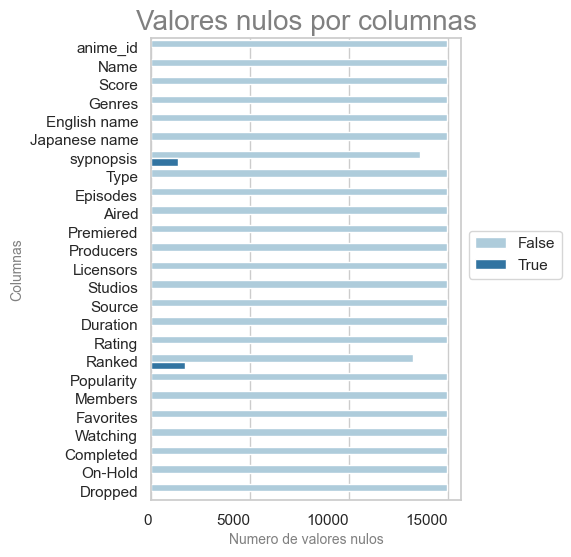

In [917]:
anime_nulos= anime.isnull()

plt.figure(figsize=(4,6))
sns.set(style="whitegrid")
sns.countplot(data=anime_nulos.melt(), y="variable", hue="value", palette="Paired" )
plt.title("Valores nulos por columnas", color="Grey", fontsize=20)
plt.ylabel("Columnas", color="Grey", fontsize=10)
plt.xlabel("Numero de valores nulos", color="Grey", fontsize=10)
plt.xticks(rotation=0, ha="right")
plt.legend(bbox_to_anchor=(1,0.6))

plt.show()

><span style="font-size: 25px; color:#839192">Hago un .copy() y empiezo a eliminar columnas que no me interesan:</span>

In [918]:
#AHORA QUE VOY A MODIFICAR COSAS VOY A HACER UN COPY PARA NO ALTERAR LA BASE DE DATOS INICIAL
anime_EDA= anime.copy()

><span style="font-size: 20px; color:#839192">He hecho una exploración por el dataset y veo que casi la mayoría de las filas de las columnas que no tienen nan tiene valor unknowns en la fila que ranked tienen nan. así que desde mi punto de vista esas filas no van a ser útiles para analizar y considero que mejor borrarlas ya que no van a aportar nada en el análisis:</span>

In [919]:
#BORRAR ESTAS COLUMNAS Y FILAS YA QUE DESDE MI PUNTO DE VISTA SON INNECESARIAS PARA EL ANALISIS QUE VOY A HACER

anime_EDA= anime_EDA.dropna(subset=["Ranked"]) #ELIMINAR FILAS RANKED

><span style="font-size: 20px; color:#839192">Como las columnas ranked y sinopsis no las voy analizar por que la sinopsis no me es util y el ranked tampoco. ya con la popularidad, el score y favoritos tengo para ver la popularidad. Así que las elimino con un .dropna():</span>

In [920]:
anime_EDA.drop(["Ranked", "sypnopsis"], axis=1, inplace=True) #ELIMINAR COLUMNAS RANKED Y SINOPSOS

In [921]:
# COMPROBAR SI SE HA BORRADO CORRECTAMENTE ESAS COLUMNAS Y NO HAY NAN
anime_EDA.isna().sum()

anime_id         0
Name             0
Score            0
Genres           0
English name     0
Japanese name    0
Type             0
Episodes         0
Aired            0
Premiered        0
Producers        0
Licensors        0
Studios          0
Source           0
Duration         0
Rating           0
Popularity       0
Members          0
Favorites        0
Watching         0
Completed        0
On-Hold          0
Dropped          0
dtype: int64

#### Valores duplicados

><span style="font-size: 20px; color:#839192">En el primer análisis vi que no hay valores duplicados así que voy a comprobarlo y hacer un drop duplicated por si acaso:</span>

In [922]:
#QUIERO VER CUANTOS VALORES DUPLICADOS TENGO 
anime.duplicated().sum()

0

In [923]:
#QUIERO ENCONTRAR LAS FILAS DUPLICADAS
anime_EDA.drop_duplicates()

,anime_id,Name,Score,Genres,English name,Japanese name,Type,Episodes,Aired,Premiered,Producers,Licensors,Studios,Source,Duration,Rating,Popularity,Members,Favorites,Watching,Completed,On-Hold,Dropped
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,カウボーイビバップ,TV,26,"Apr 3, 1998 to Apr 24, 1999",Spring 1998,Bandai Visual,"Funimation, Bandai Entertainment",Sunrise,Original,24 min. per ep.,R - 17+ (violence & profanity),39,1251960,61971,105808,718161,71513,26678
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Cowboy Bebop:The Movie,カウボーイビバップ 天国の扉,Movie,1,"Sep 1, 2001",Unknown,"Sunrise, Bandai Visual",Sony Pictures Entertainment,Bones,Original,1 hr. 55 min.,R - 17+ (violence & profanity),518,273145,1174,4143,208333,1935,770
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",Trigun,トライガン,TV,26,"Apr 1, 1998 to Sep 30, 1998",Spring 1998,Victor Entertainment,"Funimation, Geneon Entertainment USA",Madhouse,Manga,24 min. per ep.,PG-13 - Teens 13 or older,201,558913,12944,29113,343492,25465,13925
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),TV,26,"Jul 2, 2002 to Dec 24, 2002",Summer 2002,"TV Tokyo, Bandai Visual, Dentsu, Victor Entert...","Funimation, Bandai Entertainment",Sunrise,Original,25 min. per ep.,PG-13 - Teens 13 or older,1467,94683,587,4300,46165,5121,5378
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",Beet the Vandel Buster,冒険王ビィト,TV,52,"Sep 30, 2004 to Sep 29, 2005",Fall 2004,"TV Tokyo, Dentsu",Unknown,Toei Animation,Manga,23 min. per ep.,PG - Children,4369,13224,18,642,7314,766,1108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14916,47591,Kuro Gal ni Natta kara Shinyuu to shitemita.,6.51,"Romance, Shounen Ai",Unknown,黒ギャルになったから親友としてみた。,TV,Unknown,"Feb 11, 2021 to ?",Winter 2021,"Suiseisha, blackflag",Unknown,Irawias,Manga,4 min.,R+ - Mild Nudity,7387,3636,90,768,3,79,35
14917,47614,Nu Wushen de Canzhuo Spring Festival Special,6.83,"Slice of Life, Comedy",Cooking with Valkyries Spring Festival Special,Unknown,Special,1,"Feb 11, 2021",Unknown,Unknown,Unknown,Unknown,Game,10 min.,PG - Children,11973,540,8,51,168,18,2
14918,47616,Yakusoku no Neverland 2nd Season: Michishirube,4.81,"Mystery, Psychological, Supernatural, Thriller...",The Promised Neverland Season 2 Episode 5.5,約束のネバーランド 特別編「道標」,Special,1,"Feb 12, 2021",Unknown,Unknown,Unknown,CloverWorks,Manga,23 min.,R - 17+ (violence & profanity),4398,13070,90,1183,8196,119,202
14924,47795,Ai Zai Xi Yuan Qian 2nd Season,6.51,"Fantasy, Romance",Immemorial Love For You 2nd Season,爱在西元前 第二季,ONA,16,"Feb 14, 2021 to ?",Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,12411,463,35,40,0,7,7


In [924]:
#COMPRUEBO FILAS Y COLUMNAS OTRA VEZ
anime_EDA.shape

(13231, 23)

#### Valores Unknowns

><span style="font-size: 20px; color:#839192">Quiero ver el contenido de algunas columnas ya que he visto que ya no tienen Nan pero si tienen algunos valores desconocidos(Unknown):</span>

In [925]:
#QUIERO VER CUANDOS UNKNOWNS HAY EN CADA COLUMNA
unknowns= (anime_EDA =="Unknown").sum()
unknowns

anime_id            0
Name                0
Score               0
Genres             42
English name     7316
Japanese name      27
Type                0
Episodes          135
Aired              25
Premiered        8810
Producers        5574
Licensors        9495
Studios          3840
Source           2722
Duration          128
Rating            335
Popularity          0
Members             0
Favorites           0
Watching            0
Completed           0
On-Hold             0
Dropped             0
dtype: int64

In [926]:
#TOTAL DE UNKNOWNS EN EL DATAFRAME
unknowns= (anime_EDA =="Unknown").sum().sum()

unknowns

38449

##### Unknowns de la columna Aired:

In [927]:
#VER PARTE DEL CONTENIDO DE ESA COLUMNA
anime_EDA["Aired"].unique()

array(['Apr 3, 1998 to Apr 24, 1999', 'Sep 1, 2001',
       'Apr 1, 1998 to Sep 30, 1998', ..., 'Feb 11, 2021 to ?',
       'Feb 12, 2021', 'Mar 14, 2021'], dtype=object)

><span style="font-size: 20px; color:#839192">En la columna Aired he visto que va a ser dificil de analizar por como estan las fechas, algunas tienen fecha de lanzamiento y fecha final o la fecha final con interrogacion</span>
>
><span style="font-size: 20px; color:#839192">Asi que voy a hacer un regex para separar el mes de salida y el año en una columna llamada meses y luego otro para separar la columna meses en >month aired y year aired:</span>

     Lo he intentado hacer con pandas pero me dan muchos valores de NAT y algunos un poco raros asi que sigo con el regex

In [928]:
#AQUI HE HECHO UN REGEX PARA SEPARAR PARTE DE AIRED Y PODER CREAR DOS COLUMNAS SEPARADAS DE MES Y AÑO POR QUE ES LA UNICA MANERA QUE ME HA FUNCIONADO
anime_EDA["Meses"]= anime_EDA["Aired"].str.extract(r"(\w{3} \d{1,2}, \d{4})")

In [929]:
#SEPARAR LOS MESES Y Y METERLO EN UNA COLUMNA LLAMADA MES DE LANZAMIENTO
anime_EDA["Month Aired"] =anime_EDA["Meses"].str.extract(r"(\w{3})")

In [930]:
#LO MISMO CON EL AÑO
anime_EDA["Year Aired"] =anime_EDA["Meses"].str.extract(r", (\d{4})")

In [931]:
anime_EDA.head(4)

,anime_id,Name,Score,Genres,English name,Japanese name,Type,Episodes,Aired,Premiered,Producers,Licensors,Studios,Source,Duration,Rating,Popularity,Members,Favorites,Watching,Completed,On-Hold,Dropped,Meses,Month Aired,Year Aired
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,カウボーイビバップ,TV,26,"Apr 3, 1998 to Apr 24, 1999",Spring 1998,Bandai Visual,"Funimation, Bandai Entertainment",Sunrise,Original,24 min. per ep.,R - 17+ (violence & profanity),39,1251960,61971,105808,718161,71513,26678,"Apr 3, 1998",Apr,1998
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Cowboy Bebop:The Movie,カウボーイビバップ 天国の扉,Movie,1,"Sep 1, 2001",Unknown,"Sunrise, Bandai Visual",Sony Pictures Entertainment,Bones,Original,1 hr. 55 min.,R - 17+ (violence & profanity),518,273145,1174,4143,208333,1935,770,"Sep 1, 2001",Sep,2001
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",Trigun,トライガン,TV,26,"Apr 1, 1998 to Sep 30, 1998",Spring 1998,Victor Entertainment,"Funimation, Geneon Entertainment USA",Madhouse,Manga,24 min. per ep.,PG-13 - Teens 13 or older,201,558913,12944,29113,343492,25465,13925,"Apr 1, 1998",Apr,1998
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),TV,26,"Jul 2, 2002 to Dec 24, 2002",Summer 2002,"TV Tokyo, Bandai Visual, Dentsu, Victor Entert...","Funimation, Bandai Entertainment",Sunrise,Original,25 min. per ep.,PG-13 - Teens 13 or older,1467,94683,587,4300,46165,5121,5378,"Jul 2, 2002",Jul,2002


><span style="font-size: 20px; color:#839192">Ahora tengo unas columnas que sobran que son Aired y Meses, asi que voy a eliminarlas y colocar month aired en otra posicion que no sea la ultima de dataframe:</span>

In [932]:
#ELIMINAR LAS COLUMNAS AIRED Y MESES CON .DROP()
anime_EDA.drop(columns=["Aired", "Meses"], inplace=True)

In [933]:
#COMO NO QUIERO QUE MES Y AÑO SEAN LAS ULTIMAS COLUMNAS VOY A CAMBIARLAS DE SITIO

#AQUI HAGO UN POP PARA LUEGO PODER INSERTARLO EN LA POSICION QUE QUIERA Y NO SEA LA ULTIMA COLUMNA, NO ME DEJABA SIN EL POP
mes = anime_EDA.pop("Month Aired")
anime_EDA.insert(7, "Month Aired", mes)

In [934]:
#LO PONGO EN LA POSICION DE AL LADO DE MES DE LANZAMIENTO
year= anime_EDA.pop("Year Aired")
anime_EDA.insert(8, "Year Aired", year)

In [935]:
anime_EDA.head(3)

#todo OK por ahora

,anime_id,Name,Score,Genres,English name,Japanese name,Type,Month Aired,Year Aired,Episodes,Premiered,Producers,Licensors,Studios,Source,Duration,Rating,Popularity,Members,Favorites,Watching,Completed,On-Hold,Dropped
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,カウボーイビバップ,TV,Apr,1998,26,Spring 1998,Bandai Visual,"Funimation, Bandai Entertainment",Sunrise,Original,24 min. per ep.,R - 17+ (violence & profanity),39,1251960,61971,105808,718161,71513,26678
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Cowboy Bebop:The Movie,カウボーイビバップ 天国の扉,Movie,Sep,2001,1,Unknown,"Sunrise, Bandai Visual",Sony Pictures Entertainment,Bones,Original,1 hr. 55 min.,R - 17+ (violence & profanity),518,273145,1174,4143,208333,1935,770
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",Trigun,トライガン,TV,Apr,1998,26,Spring 1998,Victor Entertainment,"Funimation, Geneon Entertainment USA",Madhouse,Manga,24 min. per ep.,PG-13 - Teens 13 or older,201,558913,12944,29113,343492,25465,13925


##### Comprobar otra vez los valores Nan y unknowns:

><span style="font-size: 20px; color:#839192">Ahora es posible haya valores nan por la modificacion de la columna Aired</span>
>
><span style="font-size: 20px; color:#839192">Voy a ver si hay valores nan y si es asi hare un fillna llamando unknown a los valores nan para despues poder hacer sacar los valores unknows basandome en la moda del mismo tipo de anime y estudios:</span>

In [936]:
anime_EDA.isna().sum()

anime_id           0
Name               0
Score              0
Genres             0
English name       0
Japanese name      0
Type               0
Month Aired      934
Year Aired       934
Episodes           0
Premiered          0
Producers          0
Licensors          0
Studios            0
Source             0
Duration           0
Rating             0
Popularity         0
Members            0
Favorites          0
Watching           0
Completed          0
On-Hold            0
Dropped            0
dtype: int64

In [937]:
#POR AHORA LOS VOY A LLAMAR A LOS VALORES NAN UNKOWNS PARA PASAR A LO SIGUIENTE Y QUE NO ME DE ERROR POR LOS NAN
anime_EDA["Month Aired"]= anime_EDA["Month Aired"].fillna("Unknown")

In [938]:
# MIRAR CUANTOS UNKNOWNS TENGO EN TOTAL
anime_EDA["Month Aired"].isin(["Unknown"]).sum()

934

In [939]:
# LO MISMO CON EL AÑO
anime_EDA["Year Aired"]= anime_EDA["Year Aired"].fillna("Unknown")

In [940]:
anime_EDA["Year Aired"].isin(["Unknown"]).sum()

934

    CON ESTO QUIERO SACAR LOS VALORES UNKNOWNS BASANDOME EN EL VALOR MAS FRECUENTE DEL MISMO TIPO DE ANIME Y ESTUDIOS

In [941]:
# AQUI VOY A CALCULAR EL MES MAS FRECUENTE POR GRIPO CREANDO UN DATAFRAME CON LOS MESES AGRUPADOS POR TYPE Y STUDIOS
mes =anime_EDA.groupby(["Type","Studios"])["Month Aired"].apply(lambda x:x.mode().iloc[0] if not x.empty else "Unknown").reset_index()

In [942]:
grupo= mes.set_index(["Type","Studios"])["Month Aired"].to_dict()

In [943]:
anime_EDA["Month Aired"]= anime_EDA.apply(lambda f :grupo.get((f["Type"], f["Studios"]),"Unknown") if f["Month Aired"] =="Unknown" else f["Month Aired"], axis=1)

In [944]:
# VER CUANTOS UNKNOWN HAY EN LA COLUMNA
anime_EDA["Month Aired"].isin(["Unknown"]).sum()

625

     HE QUITADO ALGUNOS DE LA COLUMNA MONTH AIRED PERO TODAVIA QUEDAN 625 UNKNOWN

##### Unknowns de la columna premiered:

In [945]:
anime_EDA["Premiered"].unique()

array(['Spring 1998', 'Unknown', 'Summer 2002', 'Fall 2004',
       'Spring 2005', 'Fall 2002', 'Spring 2004', 'Fall 1999',
       'Fall 2001', 'Spring 2003', 'Fall 1995', 'Fall 1997',
       'Winter 1996', 'Spring 2002', 'Winter 2005', 'Spring 2001',
       'Spring 1999', 'Fall 2003', 'Summer 2003', 'Summer 2004',
       'Fall 2005', 'Winter 2002', 'Summer 2005', 'Spring 1979',
       'Spring 1985', 'Spring 1986', 'Spring 1993', 'Spring 1995',
       'Spring 1996', 'Spring 1994', 'Winter 1994', 'Spring 2000',
       'Fall 1996', 'Spring 1997', 'Winter 2004', 'Winter 1998',
       'Summer 2001', 'Winter 1999', 'Fall 1998', 'Fall 1993',
       'Summer 2000', 'Fall 2000', 'Winter 2003', 'Spring 1989',
       'Winter 1986', 'Summer 1997', 'Summer 1999', 'Winter 1979',
       'Winter 2001', 'Spring 1978', 'Winter 1973', 'Spring 1991',
       'Fall 1973', 'Fall 1989', 'Fall 1994', 'Winter 1992', 'Fall 1979',
       'Summer 1998', 'Winter 2000', 'Winter 2006', 'Summer 1995',
       'Fall 199

><span style="font-size: 20px; color:#839192">En la columna Premiered hay algunos valores unknowns y tambien todos tienen el año de salida y para analizar asi puede ser un poco complicado</span>
>
><span style="font-size: 20px; color:#839192">Primero voy a quitar el año de las estaciones del año por que eso no me interesa analizarlo ya que algunos tienen año y otros no:</span>

In [946]:
# CREAR UNA NUEVA COLUMNA CON AÑO
anime_EDA["Year season"]= anime_EDA["Premiered"].str.split().str[1] 

In [947]:
# CREAR UNA COLUMNA CON LA ESTACION DEL AÑO LLAMADA SEASON
anime_EDA["Season"]= anime_EDA["Premiered"].str.split().str[0]  

In [948]:
# BORRAR LA COLUMNA PREMIERED
anime_EDA= anime_EDA.drop(columns=["Premiered"])

In [949]:
#AHORA VOY A COLOCAR EN LA POSICION 9 DONDE ESTABA PREMIERE A SEASON PARA QUE NO ESTE AL FINAL DE DATAFRAME
season= anime_EDA.pop("Season")
anime_EDA.insert(9, "Season", season)

In [950]:
# LO MISMO CON YEAR SEASON
año= anime_EDA.pop("Year season")
anime_EDA.insert(10, "Year season", año)

In [951]:
anime_EDA.head(3)

,anime_id,Name,Score,Genres,English name,Japanese name,Type,Month Aired,Year Aired,Season,Year season,Episodes,Producers,Licensors,Studios,Source,Duration,Rating,Popularity,Members,Favorites,Watching,Completed,On-Hold,Dropped
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,カウボーイビバップ,TV,Apr,1998,Spring,1998,26,Bandai Visual,"Funimation, Bandai Entertainment",Sunrise,Original,24 min. per ep.,R - 17+ (violence & profanity),39,1251960,61971,105808,718161,71513,26678
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Cowboy Bebop:The Movie,カウボーイビバップ 天国の扉,Movie,Sep,2001,Unknown,NaN,1,"Sunrise, Bandai Visual",Sony Pictures Entertainment,Bones,Original,1 hr. 55 min.,R - 17+ (violence & profanity),518,273145,1174,4143,208333,1935,770
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",Trigun,トライガン,TV,Apr,1998,Spring,1998,26,Victor Entertainment,"Funimation, Geneon Entertainment USA",Madhouse,Manga,24 min. per ep.,PG-13 - Teens 13 or older,201,558913,12944,29113,343492,25465,13925


     HE VISTO QUE HA FUNCIONADO PERO HAY UNOS VALOR NAN EN LA COLUMNA AÑOS QUE INTENTARE ARREGLAR MAS ADELANTE

><span style="font-size: 20px; color:#839192">Y ahora voy a hacer una funcion lambda para que segun el mes de lanzamiento me ponga en la columna premiered la estacion del año que le corresponde y quitar los unknowns:</span>

In [952]:
# VER CUANTOS UNKNOWN HAY EN LA COLUMNA
anime_EDA["Season"].isin(["Unknown"]).sum()

8810

In [953]:
#MAPEAR LOS MESES A ESTACIONES DEL AÑO
estaciones={"Dec": "Winter",
              "Jan": "Winter",
              "Feb":"Winter",
              "Mar":"Spring" ,
              "Apr" :"Spring",
              "May":"Spring" ,
              "Jun": "Summer",
              "Jul" :"Summer",
              "Aug": "Summer",
              "Sep":"Fall",
              "Oct":"Fall" ,
              "Nov": "Fall"}

# CON ESTE REEMPLAZO LOS UNKNOWS POR LAS ESTACIONES
vdesconocidos= lambda row: estaciones.get(row["Month Aired"],row["Season"])
anime_EDA["Season"]= anime_EDA.apply(vdesconocidos, axis=1)

In [954]:
#COMPROBAR SI SE HAN CAMBIADO
anime_EDA["Season"].unique() 

array(['Spring', 'Fall', 'Summer', 'Winter', 'Unknown'], dtype=object)

In [955]:
# VER CUANTOS UNKNOWN HAN QUEDADO EN LA COLUMNA
anime_EDA["Season"].isin(["Unknown"]).sum()

623

##### Nan y unknowns de la columna Year Aired y year season

><span style="font-size: 20px; color:#839192">En la columna anterior he visto que year season tiene valores nan y unknowns y en la year aired tiene tambien valores unknowns asi que las voy el año que este con unknowns en year aired le voy a poner el año que tenga year season:</span>

In [956]:
anime_EDA["Year Aired"].unique()

array(['1998', '2001', '2002', '2004', '2005', '1999', '2003', '1995',
       '1997', '1996', '1988', '1993', '2000', '1979', '1989', '1991',
       '1985', '1986', '1994', '1992', '1990', '1978', '1973', '2006',
       '1987', '1984', '1982', '1977', '1983', '1980', '1976', '1968',
       '1981', 'Unknown', '2007', '1971', '1967', '1975', '1962', '1965',
       '1969', '1974', '1964', '2008', '1972', '1970', '1966', '1963',
       '1945', '2009', '2012', '1933', '1943', '2010', '1931', '1932',
       '1934', '1960', '1958', '2011', '1959', '1947', '1929', '1917',
       '1930', '1936', '1935', '1938', '1957', '1918', '1927', '1928',
       '1937', '1940', '1944', '1955', '1956', '1961', '2016', '2013',
       '2019', '1941', '2014', '2015', '2017', '2018', '1942', '1926',
       '1948', '2021', '2020'], dtype=object)

In [957]:
# VER CUANTOS UNKNOWN TIENE LA COLUMNA 
anime_EDA["Year Aired"].isin(["Unknown"]).sum()

934

In [958]:
anime_EDA["Year Aired"] =anime_EDA["Year Aired"].replace("Unknown",pd.NA).combine_first(anime_EDA["Year season"])

In [959]:
# BORRAR LA COLUMNA Year season
anime_EDA= anime_EDA.drop(columns=["Year season"])

In [960]:
anime_EDA.head(4)

,anime_id,Name,Score,Genres,English name,Japanese name,Type,Month Aired,Year Aired,Season,Episodes,Producers,Licensors,Studios,Source,Duration,Rating,Popularity,Members,Favorites,Watching,Completed,On-Hold,Dropped
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,カウボーイビバップ,TV,Apr,1998,Spring,26,Bandai Visual,"Funimation, Bandai Entertainment",Sunrise,Original,24 min. per ep.,R - 17+ (violence & profanity),39,1251960,61971,105808,718161,71513,26678
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Cowboy Bebop:The Movie,カウボーイビバップ 天国の扉,Movie,Sep,2001,Fall,1,"Sunrise, Bandai Visual",Sony Pictures Entertainment,Bones,Original,1 hr. 55 min.,R - 17+ (violence & profanity),518,273145,1174,4143,208333,1935,770
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",Trigun,トライガン,TV,Apr,1998,Spring,26,Victor Entertainment,"Funimation, Geneon Entertainment USA",Madhouse,Manga,24 min. per ep.,PG-13 - Teens 13 or older,201,558913,12944,29113,343492,25465,13925
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),TV,Jul,2002,Summer,26,"TV Tokyo, Bandai Visual, Dentsu, Victor Entert...","Funimation, Bandai Entertainment",Sunrise,Original,25 min. per ep.,PG-13 - Teens 13 or older,1467,94683,587,4300,46165,5121,5378


In [961]:
#COMPRUEBO LAS FILAS NAN Y ME HE QUITADO ALGUNAS
anime_EDA["Year Aired"].isna().sum()

927

In [962]:
# VUELVO A RENOMBRAR LOS NAN CON VALORES OTROS
anime_EDA["Year Aired"]= anime_EDA["Year Aired"].fillna("Others")

In [963]:
# Y COMPRUEBO
anime_EDA.isna().sum()

anime_id         0
Name             0
Score            0
Genres           0
English name     0
Japanese name    0
Type             0
Month Aired      0
Year Aired       0
Season           0
Episodes         0
Producers        0
Licensors        0
Studios          0
Source           0
Duration         0
Rating           0
Popularity       0
Members          0
Favorites        0
Watching         0
Completed        0
On-Hold          0
Dropped          0
dtype: int64

##### Columna generos

In [964]:
# VER EL CONTENIDO DE LA COLUMNA GENEROS CON .UNIQUE()
anime_EDA["Genres"].unique()

array(['Action, Adventure, Comedy, Drama, Sci-Fi, Space',
       'Action, Drama, Mystery, Sci-Fi, Space',
       'Action, Sci-Fi, Adventure, Comedy, Drama, Shounen', ...,
       'Action, Cars, Sports', 'Mystery, Supernatural, School',
       'Mystery, Psychological, Supernatural, Thriller, Shounen'],
      dtype=object)

><span style="font-size: 20px; color:#839192">En la columna generos he visto que la mayoria de generos 
>     en cada fila vienen en listas.</span>
>
><span style="font-size: 20px; color:#839192">PAsi que voy a separarlos haciendo un split y un dummy para crear un nuevo dataframe de generos:</span>

In [965]:
#HAGO UNA FUNCION LAMBDA CON SPLIT PARA SEPARAR LOS GENEROS DE UNA LISTA DE GENEROS POR COMAS

anime_EDA["Genres"]= anime_EDA["Genres"].apply(lambda x: x.split(", ")) 

In [966]:
# EL GET DUMMIES PARA CREAR COLUMNAS PARA CADA GENERO QUE HE SEPARADO DE LA COLUMNA GENRES, EL .APPLY() Y .STACK PARA CONVERTIER LAS COLUMNAS EN INDICES MULTIPLES
# EL GROUPBY.MAX AGRUPAR LAS FILAS POR NIVEL 0 Y TOMA EL VALOR MAXIMO PARA CADA
generos=pd.get_dummies(anime_EDA["Genres"].apply(pd.Series).stack()).groupby(level=0).max()

In [967]:
generos

,Action,Adventure,Cars,Comedy,Dementia,Demons,Drama,Ecchi,Fantasy,Game,Harem,Historical,Horror,Josei,Kids,Magic,Martial Arts,Mecha,Military,Music,Mystery,Parody,Police,Psychological,Romance,Samurai,School,Sci-Fi,Seinen,Shoujo,Shoujo Ai,Shounen,Shounen Ai,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Unknown,Vampire
0,True,True,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False
1,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False
2,True,True,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
4,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14916,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
14917,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
14918,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True,True,False,False
14924,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [968]:
# RENOMBRAR LA COLUMNA UNKNOWN POR OTHER
generos.rename(columns={"Unknown":"Others"}, inplace=True)

##### Unknowns de la columna Rating:

In [969]:
anime_EDA["Rating"].unique()

array(['R - 17+ (violence & profanity)', 'PG-13 - Teens 13 or older',
       'PG - Children', 'R+ - Mild Nudity', 'G - All Ages', 'Unknown'],
      dtype=object)

><span style="font-size: 20px; color:#839192">En la columna Rating mas de lo mismo, va a ser poco visual analizarlo como esta</span>
>
><span style="font-size: 20px; color:#839192">Voy a hacer un regex para separar la R, PG, G y que solo se vea la columna con esos. Despues voy a quitar los unknowns sacando el valor mas comun del rating por genero:</span>

In [970]:
#SEPARAR LA R, PG, R+ Y G DEL RESTO DEL VALOR DE RATING 
anime_EDA["Rating"]= anime_EDA["Rating"].str.extract(r"(R|PG|G|)")

In [971]:
anime_EDA["Rating"].unique()

array(['R', 'PG', 'G', ''], dtype=object)

In [972]:
# RENOMBRAR A LOS NAN COMO ESTABAN POR Others
anime_EDA["Rating"] = anime_EDA["Rating"].replace("", "Others")

In [973]:
anime_EDA["Rating"].unique()

array(['R', 'PG', 'G', 'Others'], dtype=object)

><span style="font-size: 20px; color:#839192">Quitar los Others sacando el valor mas comun del rating por genero </span>

In [974]:
# QUIERO SACAR EL RATING PREDOMINANTE POR GENERO.
# ASI QUE CON LA MODA VOY A SACAR EL VALOR MAS COMUN DEL RATING POR GENERO PARA QUITAR OTHERS
generos_edades={}

for g in generos.columns:
    filas_g= anime_EDA[generos[g]==1] 
    moda_r=filas_g["Rating"].mode().iloc[0] if not filas_g.empty else "Others"
    generos_edades[g]=moda_r

In [975]:
# AQUI PONGO EL RATING MAS COMUN QUE HE SACADO POR GENERO EN LA COLUMNA 
for index, f in anime_EDA.iterrows():
    if f["Rating"]=="Others":
        genres_fila= generos.loc[index, generos.columns]
        rating= genres_fila.idxmax()
        resultado= generos_edades.get(rating,"Others")
        anime_EDA.at[index,"Rating"]= resultado

In [976]:
anime_EDA["Rating"].unique()

array(['R', 'PG', 'G'], dtype=object)

In [977]:
# VER CUANTOS OTHERS HAY EN LA COLUMNA
anime_EDA["Rating"].isin(["Others"]).sum()

0

##### Unknowns de la columna duration:

In [978]:
anime_EDA["Duration"].unique()

array(['24 min. per ep.', '1 hr. 55 min.', '25 min. per ep.',
       '23 min. per ep.', '27 min. per ep.', '24 min.', '22 min. per ep.',
       '1 hr. 44 min.', '1 hr. 27 min.', '1 hr. 22 min.',
       '30 min. per ep.', '1 hr. 31 min.', '2 hr. 4 min.',
       '1 hr. 45 min.', '52 min.', '1 hr. 59 min.', '2 hr.',
       '21 min. per ep.', '14 min. per ep.', '12 min. per ep.',
       '34 min. per ep.', '46 min. per ep.', '1 hr. 37 min.',
       '20 min. per ep.', '2 hr. 15 min.', '26 min. per ep.',
       '28 min. per ep.', '21 min.', '46 min.', '15 min. per ep.',
       '2 hr. 5 min.', '29 min. per ep.', '33 min. per ep.',
       '1 hr. 24 min.', '48 min.', '1 hr. 19 min.', '25 min.',
       '1 hr. 30 min.', '1 hr. 1 min.', '4 min. per ep.',
       '7 min. per ep.', '1 hr. 46 min.', '18 min. per ep.',
       '1 hr. 41 min.', '11 min. per ep.', '13 min. per ep.', '55 min.',
       '1 hr. 21 min.', '1 hr. 2 min.', '37 min. per ep.',
       '42 min. per ep.', '37 min.', '19 min.', '1 hr. 

><span style="font-size: 20px; color:#839192">En la columna duracion hay peliculas, series etc. Por lo tanto cuando voy a visualizarlo se hace casi imposible</span>
>
><span style="font-size: 20px; color:#839192">Quiero convertir todas las duraciones en minutos para luego poder analizarlo mejor:</span>

In [979]:
#PASAR TODAS LAS HORAS A MINUTOS 
min= r"(\d+)\s*(hr|min|sec)"

def minutos(duracion):
    total_min=0
    for min in duracion:
        value, unit= min
        value = int(value)
        if unit== "hr":
            total_min +=value*60
        elif unit == "min":
            total_min +=value
        elif unit== "sec":
            total_min+= value/60
    return round(total_min)

anime_EDA["Duracion"]= anime_EDA["Duration"].str.findall(min).apply(minutos) 
#STR.FINDALL ES PARA BUSCAR TODAS LOS PATRONES. POR EJEMPO SI ESTAN EL HR PASA A 60 MINUTOS ETC

In [980]:
#COLOCAR LA COLUMNA DURATION EN LA POSICION QUE ESTABA
anime_EDA.drop(columns=["Duration"], inplace=True)

duracion= anime_EDA.pop("Duracion")
anime_EDA.insert(11,"Duracion", duracion)

In [981]:
anime_EDA.head(4)

,anime_id,Name,Score,Genres,English name,Japanese name,Type,Month Aired,Year Aired,Season,Episodes,Duracion,Producers,Licensors,Studios,Source,Rating,Popularity,Members,Favorites,Watching,Completed,On-Hold,Dropped
0,1,Cowboy Bebop,8.78,"[Action, Adventure, Comedy, Drama, Sci-Fi, Space]",Cowboy Bebop,カウボーイビバップ,TV,Apr,1998,Spring,26,24,Bandai Visual,"Funimation, Bandai Entertainment",Sunrise,Original,R,39,1251960,61971,105808,718161,71513,26678
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"[Action, Drama, Mystery, Sci-Fi, Space]",Cowboy Bebop:The Movie,カウボーイビバップ 天国の扉,Movie,Sep,2001,Fall,1,115,"Sunrise, Bandai Visual",Sony Pictures Entertainment,Bones,Original,R,518,273145,1174,4143,208333,1935,770
2,6,Trigun,8.24,"[Action, Sci-Fi, Adventure, Comedy, Drama, Sho...",Trigun,トライガン,TV,Apr,1998,Spring,26,24,Victor Entertainment,"Funimation, Geneon Entertainment USA",Madhouse,Manga,PG,201,558913,12944,29113,343492,25465,13925
3,7,Witch Hunter Robin,7.27,"[Action, Mystery, Police, Supernatural, Drama,...",Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),TV,Jul,2002,Summer,26,25,"TV Tokyo, Bandai Visual, Dentsu, Victor Entert...","Funimation, Bandai Entertainment",Sunrise,Original,PG,1467,94683,587,4300,46165,5121,5378


In [982]:
# VER CUANTOS UNKNOWN HAY EN LA COLUMNA
anime_EDA["Duracion"].isin(["Unknown"]).sum()

0

##### Unknowns de la columna English name:

In [983]:
anime_EDA["English name"].unique()

array(['Cowboy Bebop', 'Cowboy Bebop:The Movie', 'Trigun', ...,
       'Cooking with Valkyries Spring Festival Special',
       'The Promised Neverland Season 2 Episode 5.5',
       'Immemorial Love For You 2nd Season'], dtype=object)

><span style="font-size: 20px; color:#839192">En la columna English name hay algunos valores unknown asi que voy a asignarle a los unknowns el nombre de la columna name:</span>

In [984]:
#SUSTITUIR LOS VALORES UNKNOWN DE ENGLISH NAME POR EL NOMBRE ORIGINAL
anime_EDA["English name"]= anime_EDA.apply(lambda row:row["Name"] if row["English name"]=="Unknown" else row ["English name"],axis=1)

In [985]:
anime_EDA.head(4)

,anime_id,Name,Score,Genres,English name,Japanese name,Type,Month Aired,Year Aired,Season,Episodes,Duracion,Producers,Licensors,Studios,Source,Rating,Popularity,Members,Favorites,Watching,Completed,On-Hold,Dropped
0,1,Cowboy Bebop,8.78,"[Action, Adventure, Comedy, Drama, Sci-Fi, Space]",Cowboy Bebop,カウボーイビバップ,TV,Apr,1998,Spring,26,24,Bandai Visual,"Funimation, Bandai Entertainment",Sunrise,Original,R,39,1251960,61971,105808,718161,71513,26678
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"[Action, Drama, Mystery, Sci-Fi, Space]",Cowboy Bebop:The Movie,カウボーイビバップ 天国の扉,Movie,Sep,2001,Fall,1,115,"Sunrise, Bandai Visual",Sony Pictures Entertainment,Bones,Original,R,518,273145,1174,4143,208333,1935,770
2,6,Trigun,8.24,"[Action, Sci-Fi, Adventure, Comedy, Drama, Sho...",Trigun,トライガン,TV,Apr,1998,Spring,26,24,Victor Entertainment,"Funimation, Geneon Entertainment USA",Madhouse,Manga,PG,201,558913,12944,29113,343492,25465,13925
3,7,Witch Hunter Robin,7.27,"[Action, Mystery, Police, Supernatural, Drama,...",Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),TV,Jul,2002,Summer,26,25,"TV Tokyo, Bandai Visual, Dentsu, Victor Entert...","Funimation, Bandai Entertainment",Sunrise,Original,PG,1467,94683,587,4300,46165,5121,5378


In [986]:
# VER CUANTOS UNKNOWN HAY EN LA COLUMNA
anime_EDA["English name"].isin(["Unknown"]).sum()

0

##### Eliminar lo que no me interesa 

><span style="font-size: 20px; color:#839192">Ahora que ya he rellenado algunos unknowns con la columna producers y licensor voy a borrar las columnas que no me hacen falta</span>

In [987]:
#BORRAR ESTAS COLUMNAS YA QUE DESDE MI PUNTO DE VISTA SON INNECESARIAS PARA EL ANALISIS QUE VOY A HACER
anime_EDA.drop(["Japanese name","anime_id","Producers", "Licensors", "Year Aired", "Studios", "Source"], axis=1, inplace=True)

In [988]:
#COMPROBAR SI SE HAN ELIMINADO CORRECTAMENTE
anime_EDA.head()

,Name,Score,Genres,English name,Type,Month Aired,Season,Episodes,Duracion,Rating,Popularity,Members,Favorites,Watching,Completed,On-Hold,Dropped
0,Cowboy Bebop,8.78,"[Action, Adventure, Comedy, Drama, Sci-Fi, Space]",Cowboy Bebop,TV,Apr,Spring,26,24,R,39,1251960,61971,105808,718161,71513,26678
1,Cowboy Bebop: Tengoku no Tobira,8.39,"[Action, Drama, Mystery, Sci-Fi, Space]",Cowboy Bebop:The Movie,Movie,Sep,Fall,1,115,R,518,273145,1174,4143,208333,1935,770
2,Trigun,8.24,"[Action, Sci-Fi, Adventure, Comedy, Drama, Sho...",Trigun,TV,Apr,Spring,26,24,PG,201,558913,12944,29113,343492,25465,13925
3,Witch Hunter Robin,7.27,"[Action, Mystery, Police, Supernatural, Drama,...",Witch Hunter Robin,TV,Jul,Summer,26,25,PG,1467,94683,587,4300,46165,5121,5378
4,Bouken Ou Beet,6.98,"[Adventure, Fantasy, Shounen, Supernatural]",Beet the Vandel Buster,TV,Sep,Fall,52,23,PG,4369,13224,18,642,7314,766,1108


In [989]:
# VER CUANTOS UNKNOWNS QUEDAN
unknowns= (anime_EDA =="Unknown").sum()
unknowns

Name              0
Score             0
Genres            0
English name      0
Type              0
Month Aired     625
Season          623
Episodes        135
Duracion          0
Rating            0
Popularity        0
Members           0
Favorites         0
Watching          0
Completed         0
On-Hold           0
Dropped           0
dtype: int64

In [990]:
# RENOMBRAR TODOS ESOS UNKNOWNS PARA QUE QUEDE VISUALMENTE MEJOR
anime_EDA.replace("Unknown","Other", inplace=True)

In [991]:
# MIRAR EL TOTAL DE OTHERS - EN EL PRIMER ANALISIS HABIA 45783
unknowns= (anime_EDA =="Other").sum().sum()
unknowns

1383

## <span style="color:#85929E "> GUARDAR BASE DE DATOS </span> 

In [992]:
#Guardar base de datos limpia
#ruta= "./anime-filtered-Copy.csv"
#anime_copia.to_csv(ruta, index=False, encoding='utf-8')

## <span style="color:#85929E "> ANALISIS EXPLORATORIO </span> 

In [993]:
anime_EDA


,Name,Score,Genres,English name,Type,Month Aired,Season,Episodes,Duracion,Rating,Popularity,Members,Favorites,Watching,Completed,On-Hold,Dropped
0,Cowboy Bebop,8.78,"[Action, Adventure, Comedy, Drama, Sci-Fi, Space]",Cowboy Bebop,TV,Apr,Spring,26,24,R,39,1251960,61971,105808,718161,71513,26678
1,Cowboy Bebop: Tengoku no Tobira,8.39,"[Action, Drama, Mystery, Sci-Fi, Space]",Cowboy Bebop:The Movie,Movie,Sep,Fall,1,115,R,518,273145,1174,4143,208333,1935,770
2,Trigun,8.24,"[Action, Sci-Fi, Adventure, Comedy, Drama, Sho...",Trigun,TV,Apr,Spring,26,24,PG,201,558913,12944,29113,343492,25465,13925
3,Witch Hunter Robin,7.27,"[Action, Mystery, Police, Supernatural, Drama,...",Witch Hunter Robin,TV,Jul,Summer,26,25,PG,1467,94683,587,4300,46165,5121,5378
4,Bouken Ou Beet,6.98,"[Adventure, Fantasy, Shounen, Supernatural]",Beet the Vandel Buster,TV,Sep,Fall,52,23,PG,4369,13224,18,642,7314,766,1108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14916,Kuro Gal ni Natta kara Shinyuu to shitemita.,6.51,"[Romance, Shounen Ai]",Kuro Gal ni Natta kara Shinyuu to shitemita.,TV,Feb,Winter,Other,4,R,7387,3636,90,768,3,79,35
14917,Nu Wushen de Canzhuo Spring Festival Special,6.83,"[Slice of Life, Comedy]",Cooking with Valkyries Spring Festival Special,Special,Feb,Winter,1,10,PG,11973,540,8,51,168,18,2
14918,Yakusoku no Neverland 2nd Season: Michishirube,4.81,"[Mystery, Psychological, Supernatural, Thrille...",The Promised Neverland Season 2 Episode 5.5,Special,Feb,Winter,1,23,R,4398,13070,90,1183,8196,119,202
14924,Ai Zai Xi Yuan Qian 2nd Season,6.51,"[Fantasy, Romance]",Immemorial Love For You 2nd Season,ONA,Feb,Winter,16,0,PG,12411,463,35,40,0,7,7


##### DAFAFRAME GENEROS

In [994]:
generos

,Action,Adventure,Cars,Comedy,Dementia,Demons,Drama,Ecchi,Fantasy,Game,Harem,Historical,Horror,Josei,Kids,Magic,Martial Arts,Mecha,Military,Music,Mystery,Parody,Police,Psychological,Romance,Samurai,School,Sci-Fi,Seinen,Shoujo,Shoujo Ai,Shounen,Shounen Ai,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Others,Vampire
0,True,True,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False
1,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False
2,True,True,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
4,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14916,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
14917,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
14918,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True,True,False,False
14924,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


##### SIGNIFICADO DE LAS COLUMNAS

| <!-- -->      | <!-- -->        |
|:-------------:|:---------------:|
| **Name**| *Nombre del anime*|
| **Score** | *Puntuación media del anime* |
| **Genres** | *Generos del anime* |
| **English name** | *Nombre del anime en ingles* |
| **Type** | *Tipo de anime. serie, película u OVA* |
| **Episodes** | *Episodios del anime* |
| **Month Aired** | *Meses en los que se emitió el anime* |
| **Season** | *La temporada y año en que se estrenó el anime* |
| **Duration** | *La duración de cada episodio* |
| **Rating** | *La edad recomendada* |
| **Popularity** | *la popularidad del anime* |
| **Members** | *La cantidad de personas que tienen el anime en su lista* |
| **Favorites** | *La cantidad de personas que han marcado el anime como favorito* |
| **Watching** | *La cantidad de personas que actualmente ven el anime* |
| **Completed** | *La cantidad de personas que han completado la visualización del anime.* |
| **On-Hold** | *La cantidad de usuarion que estan a la espera de ver un anime* |
| **Dropped** | *La cantidad de usuarios que han abandonado el anime* |

#### INFORMACION GENERAL DE LA BASE DE DATOS

In [995]:
#INFORMACION
anime_EDA.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13231 entries, 0 to 14943
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          13231 non-null  object 
 1   Score         13231 non-null  float64
 2   Genres        13231 non-null  object 
 3   English name  13231 non-null  object 
 4   Type          13231 non-null  object 
 5   Month Aired   13231 non-null  object 
 6   Season        13231 non-null  object 
 7   Episodes      13231 non-null  object 
 8   Duracion      13231 non-null  int64  
 9   Rating        13231 non-null  object 
 10  Popularity    13231 non-null  int64  
 11  Members       13231 non-null  int64  
 12  Favorites     13231 non-null  int64  
 13  Watching      13231 non-null  int64  
 14  Completed     13231 non-null  int64  
 15  On-Hold       13231 non-null  int64  
 16  Dropped       13231 non-null  int64  
dtypes: float64(1), int64(8), object(8)
memory usage: 2.3+ MB


In [996]:
anime_EDA.isna().sum()

Name            0
Score           0
Genres          0
English name    0
Type            0
Month Aired     0
Season          0
Episodes        0
Duracion        0
Rating          0
Popularity      0
Members         0
Favorites       0
Watching        0
Completed       0
On-Hold         0
Dropped         0
dtype: int64

In [862]:
#VER LAS FILAS Y COLUMNAS QUE TIENE
anime_EDA.shape

(13231, 17)

In [863]:
#TIPOS DE DATOS
anime_EDA.dtypes.value_counts()

object     8
int64      8
float64    1
Name: count, dtype: int64

In [864]:
# VER EL DESCRIBE DE TIPO OBJECT
anime_EDA.describe(include=object).round(2)

,Name,Genres,English name,Type,Month Aired,Season,Episodes,Rating
count,13231,13231,13231,13231,13231,13231,13231,13231
unique,13230,4574,13075,6,13,5,199,3
top,Hinamatsuri,[Comedy],Cyborg 009,TV,Apr,Spring,1,PG
freq,2,555,4,4476,1963,3554,6059,7371


In [865]:
# VER EL DESCRIBE DE VARIABLES NUMERICAS
anime_EDA.describe(exclude=object).round(2)

,Score,Duracion,Popularity,Members,Favorites,Watching,Completed,On-Hold,Dropped
count,13231.00,13231.00,13231.00,13231.00,13231.0,13231.00,13231.00,13231.00,13231.00
mean,6.55,25.99,7464.24,45053.04,601.6,2907.97,28969.15,1243.03,1534.56
std,0.82,26.51,4487.07,142710.54,4672.3,16124.08,103914.01,4890.90,5412.44
min,1.85,0.00,1.00,200.00,0.0,0.00,0.00,0.00,0.00
25%,6.12,5.00,3393.00,641.00,1.0,26.00,247.00,14.00,48.00
50%,6.51,23.00,7518.00,3388.00,5.0,113.00,1559.00,71.00,97.00
75%,7.08,26.00,11513.50,23210.00,51.0,803.00,12512.50,459.00,454.00
max,9.19,167.00,17500.00,2589552.00,183914.0,887333.00,2182587.00,187919.00,174710.00


In [866]:
# HACER LA CORRELACION DE LOS VALORES NUMERICOS DE DATADRAME
columnas= anime_EDA.select_dtypes(exclude=object).corr().round(2)
columnas

,Score,Duracion,Popularity,Members,Favorites,Watching,Completed,On-Hold,Dropped
Score,1.00,0.29,-0.57,0.41,0.25,0.24,0.37,0.32,0.25
Duracion,0.29,1.00,-0.17,0.06,0.02,-0.01,0.06,-0.01,-0.02
Popularity,-0.57,-0.17,1.00,-0.45,-0.20,-0.27,-0.41,-0.37,-0.39
Members,0.41,0.06,-0.45,1.00,0.78,0.61,0.98,0.79,0.75
Favorites,0.25,0.02,-0.20,0.78,1.00,0.61,0.75,0.74,0.59
Watching,0.24,-0.01,-0.27,0.61,0.61,1.00,0.47,0.73,0.65
Completed,0.37,0.06,-0.41,0.98,0.75,0.47,1.00,0.68,0.66
On-Hold,0.32,-0.01,-0.37,0.79,0.74,0.73,0.68,1.00,0.89
Dropped,0.25,-0.02,-0.39,0.75,0.59,0.65,0.66,0.89,1.00


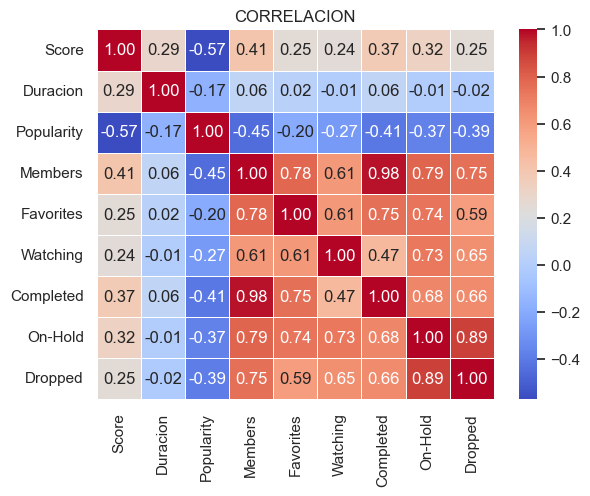

In [867]:
sns.heatmap(columnas, annot=True,cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title("CORRELACION")
plt.show()

#### HIPOTESIS

><span style="color:#839192" >1. Existe relación entre la puntuación media y la popularidad.</span>
>
><span style="color:#839192" >2. Las puntuaciones se puede ver afectada por la duracion del anime.</span>
>
><span style="color:#839192" >3. Las series de anime con combinaciones de múltiples géneros tienden a tener puntuaciones más altas.</span>
>
><span style="color:#839192" >4. Los animes estrenados en ciertas estaciones (primavera, verano, otoño) pueden tener puntuaciones más altas.</span>
>
><span style="color:#839192" >5. Las películas de anime tienen puntuaciones más altas en comparación con las series de televisión, posiblemente debido a una duración más larga que permite una narrativa más intrincada.</span>
>
><span style=" color:#839192" >6. Impacto de la duración del anime en la cantidad de personas que lo completan.</span>
>
><span style="color:#839192" >7. Los animes con clasificaciones de edad más altas pueden tener menor popularidad, ya que restringen al público potencial.</span>
>
><span style="color:#839192" >8. El mes en que se estrena un anime puede influir en su clasificación.</span>
>
><span style="color:#839192" >9. El número de espectadores que han completado un anime está positivamente correlacionado con su puntuación.</span>

### ANALISIS UNIVARIANTE:

##### MEDIDAS DE TENDENCIA CENTRAL

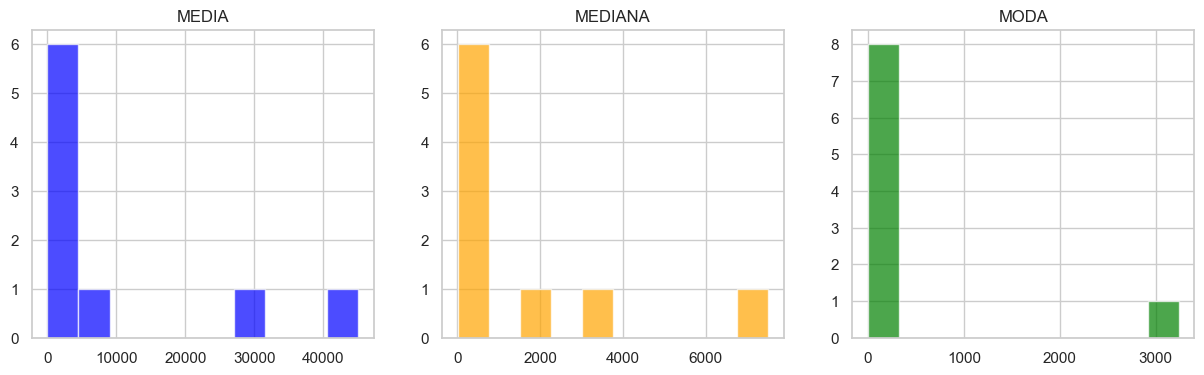

In [868]:
media= anime_EDA.mean(numeric_only=True)
mediana= anime_EDA.median(numeric_only=True)
moda= anime_EDA.mode(numeric_only=True).iloc[0]

tcentral= pd.DataFrame({"Media":media,"Mediana": mediana, "Moda":moda})

plt.figure(figsize=(15, 4))

plt.subplot(1,3,1)
plt.hist(tcentral["Media"],  color='blue', alpha=0.7)
plt.title("MEDIA")

plt.subplot(1,3,2)
plt.hist(tcentral["Mediana"], color='orange', alpha=0.7)
plt.title("MEDIANA")

plt.subplot(1,3,3)
plt.hist(tcentral["Moda"], color='green', alpha=0.7)
plt.title("MODA")


plt.show()
plt.show()

#### MEDIDAS DE DISPERSION

##### GENEROS

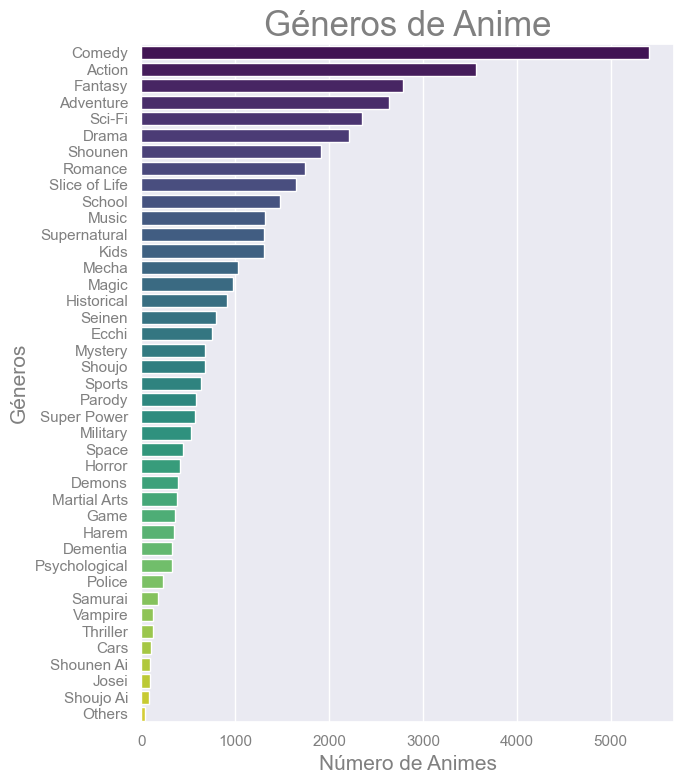

In [869]:
grafico_gen= generos.sum().sort_values(ascending= False)

plt.figure(figsize=(7,8))
sns.set_style("darkgrid")
ax = sns.barplot(x=grafico_gen.values, y=grafico_gen.index, hue=grafico_gen.index, palette="viridis", dodge=False)
plt.title("Géneros de Anime", color="Grey", fontsize=25)
plt.xlabel("Número de Animes", color= "Grey", fontsize=15)
plt.ylabel("Géneros",color = "Grey", fontsize =15)
plt.tick_params(axis="x", colors="grey")
plt.tick_params(axis="y", colors="grey")

plt.tight_layout()
plt.show()

><span style="font-size: 25px; color:#839192 " >En esta grafica podemos ver que los generos mas comunes son comedia, accion, aventura, fantasia, ciencia ficcion y drama</span>

##### LA ESTACION DEL AÑO MAS COMUN PARA EL ESTRENO DE UN ANIME

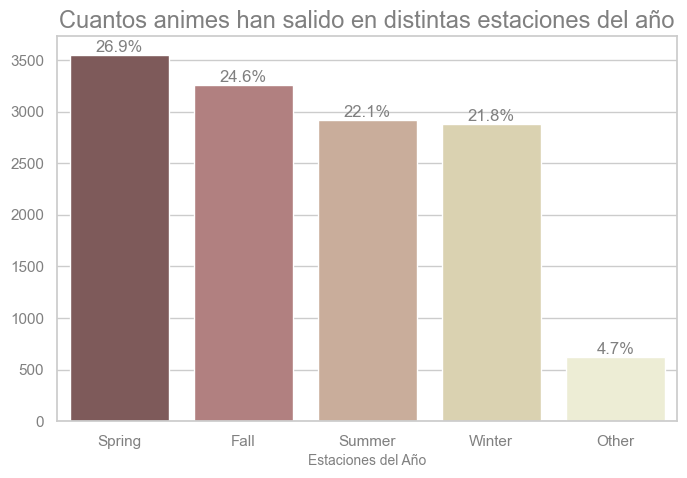

In [870]:
season= anime_EDA["Season"].value_counts()

sns.set(style="whitegrid")
plt.figure(figsize=(8,5))
sns.barplot(x=season.index, y=season.values, hue=season.index, palette="pink")
plt.title("Cuantos animes han salido en distintas estaciones del año", color= "Grey", fontsize =17)
plt.xlabel("Estaciones del Año", color="Grey", fontsize= 10)
plt.tick_params(axis="x", colors="grey")
plt.tick_params(axis="y", colors="grey")

# ES PARA PONER EL PORCENTAJE ARRIBA DE CADA COLUMNAA
for i, value in enumerate(season.values):
    porcentaje =(value / season.sum())* 100
    plt.text(i, value+0.1, f"{porcentaje:.1f}%", ha="center",va="bottom", color="grey")

plt.show()

><span style="font-size: 25px; color:#839192">En esta columna podemos ver que en primavera y otoño suelen salir mas animes pero no hay mucha diferencia del resto. igualmente luego se vera si esta relacionado la estacion del año con la popularidad del anime</span>

##### QUE RATING ES MAS COMUN EN ANIMES

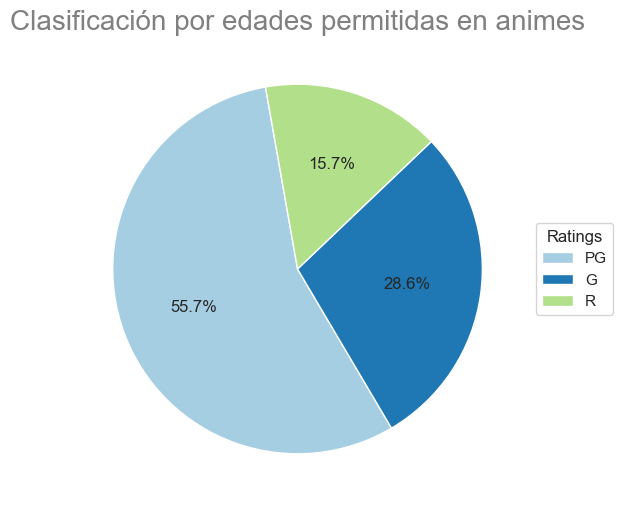

In [871]:
edades =anime_EDA["Rating"].value_counts()

plt.figure(figsize=(6,6), facecolor="None")
plt.pie(edades, startangle=100, colors=sns.color_palette("Paired"), autopct="%1.1f%%")
plt.title("Clasificación por edades permitidas en animes", color="Grey", fontsize=20)
plt.legend(labels=edades.index, title="Ratings",bbox_to_anchor=(1.1,0.5), loc="center" ) # poner PG, G, R EN LA GRAFICA

plt.show()

><span style="font-size: 25px; color:#839192">Aqui podemos ver que el rating de edad del 57% de los animes esta dirigido para niños</span>

     PG- PARA NIÑOS
     R- RESTRIGIDO A MENORES DE 17 AÑOS
     G - TODOS LOS PUBLICOS

     ponerlo en la grafica!!!!!!!!!!

##### EL MES MAS COMUN DEL ESTRENO DE LOS ANIMES

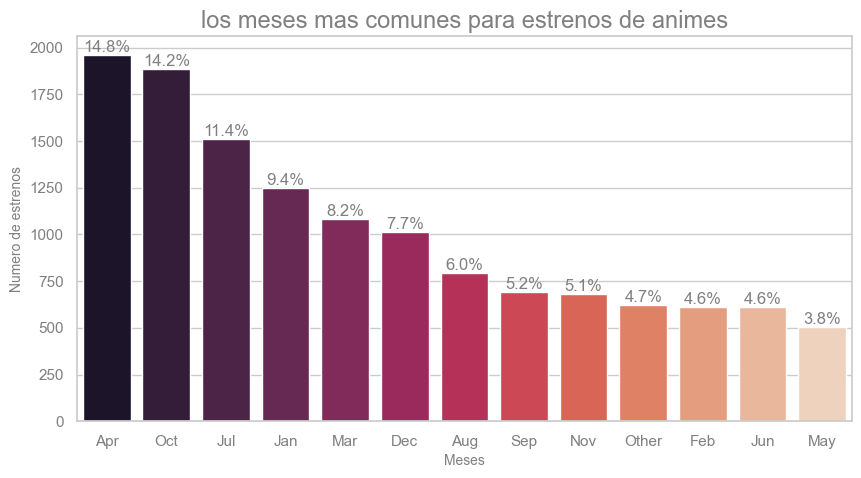

In [872]:
month= anime_EDA["Month Aired"].value_counts()

sns.set(style="whitegrid")
plt.figure(figsize=(10,5))
sns.barplot(x=month.index, y=month.values, hue=month.index, palette="rocket")
plt.title("los meses mas comunes para estrenos de animes", color="Grey", fontsize=17)
plt.xlabel("Meses", color="Grey", fontsize=10)
plt.ylabel("Numero de estrenos", color="Grey", fontsize=10)
plt.tick_params(axis="x", colors="grey")
plt.tick_params(axis="y", colors="grey")

# ES PARA PONER EL PORCENTAJE ARRIBA DE CADA COLUMNAA
for i, value in enumerate(month.values):
    porcentaje = (value /month.sum()) * 100
    plt.text(i, value+ 0.1, f"{porcentaje:.1f}%", ha="center",va="bottom", color="grey")

plt.show()

><span style="font-size: 25px; color:#839192">En este grafico podemos ver que los meses mas comunes de estrenos de anime son en april y octubre</span>

##### QUE TIPO DE ANIME ES MAS COMUN

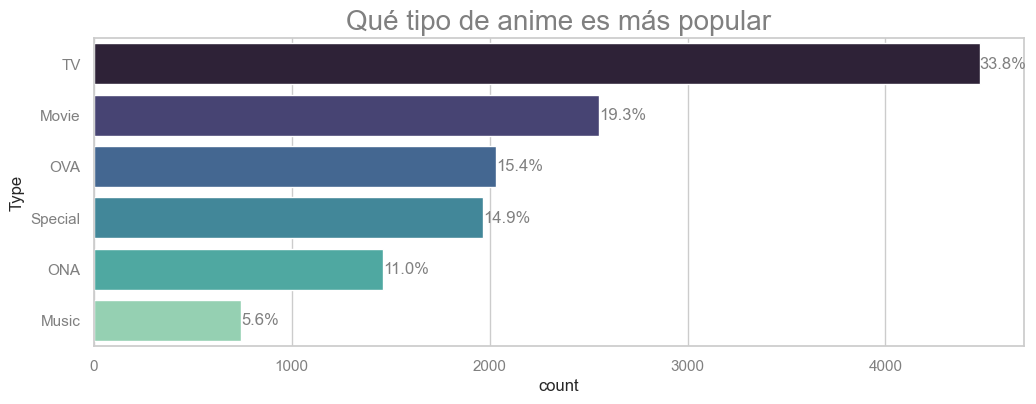

In [873]:
tipo= anime_EDA["Type"]

plt.figure(figsize=(12,4))
sns.countplot(y=tipo, order=tipo.value_counts().index, palette="mako", hue= tipo)
plt.title("Qué tipo de anime es más popular", color="Grey",fontsize=20)
plt.tick_params(axis="x", colors="grey")
plt.tick_params(axis="y", colors="grey")

total_animes= len(tipo)
for i, value in enumerate(tipo.value_counts().values):
    porcentaje=(value / total_animes) * 100
    plt.text(value+0.1, i, f"{porcentaje:.1f}%", ha="left", va="center", color="grey")

plt.show()

><span style="font-size: 25px; color:#839192">Los tipos de animes mas comunes con diferencia son las series. </span>

#### ANALISIS BIVARIANTE

##### LAS 10 SERIES DE ANIMES CON MAS PUNTUACION

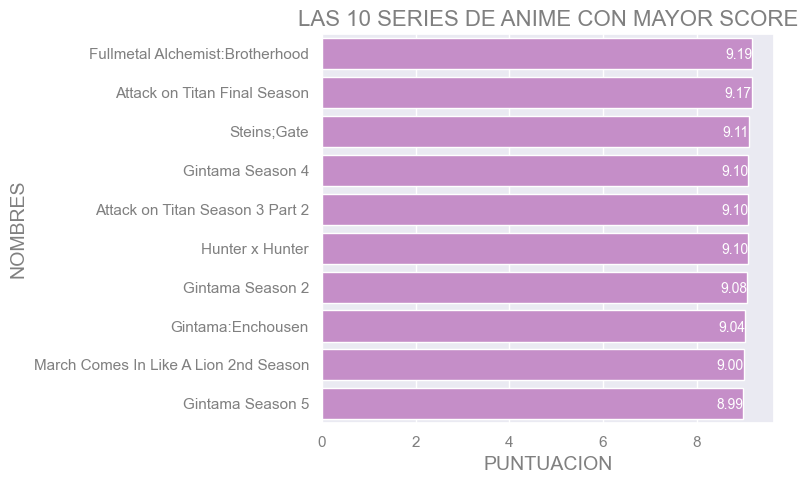

In [874]:
anime_tv= anime_EDA[anime_EDA["Type"]=="TV"]
anime_tv= anime_tv.sort_values(by="Score", ascending=False).head(10)

plt.figure(figsize=(8,5))
sns.set_style("darkgrid")
ax=sns.barplot(x="Score", y="English name", data=anime_tv, color= "#CE84D2")
plt.title("LAS 10 SERIES DE ANIME CON MAYOR SCORE", color="Grey", fontsize=16)
plt.xlabel("PUNTUACION", color="Grey", fontsize=14)
plt.ylabel("NOMBRES", color="Grey", fontsize=14)
plt.tick_params(axis="x", colors="grey")
plt.tick_params(axis="y", colors="grey")

for index, value in enumerate(anime_tv["Score"]):
    ax.text(value, index, f"{value:.2f}",ha="right", va="center_baseline", color="white", fontsize=10)
    
plt.tight_layout()
plt.show()

##### LAS 10 PELICULAS DE ANIME CON MAS PUNTUACION

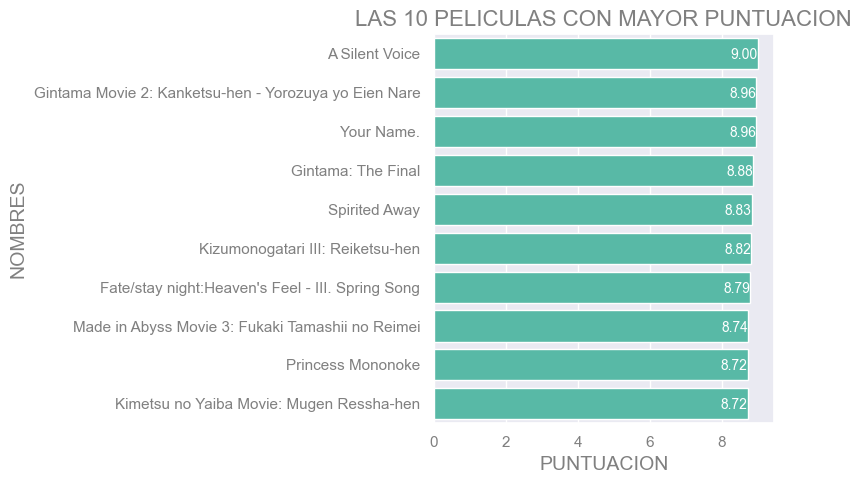

In [875]:
anime_mov= anime_EDA[anime_EDA["Type"]=="Movie"]
anime_mov= anime_mov.sort_values(by="Score", ascending=False).head(10)

plt.figure(figsize=(8,5))
sns.set_style("darkgrid")
ax=sns.barplot(x="Score", y="English name", data=anime_mov, color= "#48C9B0")
plt.title("LAS 10 PELICULAS CON MAYOR PUNTUACION", color="Grey", fontsize=16)
plt.xlabel("PUNTUACION", color="Grey", fontsize=14)
plt.ylabel("NOMBRES", color="Grey", fontsize=14)
plt.tick_params(axis="x", colors="grey")
plt.tick_params(axis="y", colors="grey")

for index, value in enumerate(anime_mov["Score"]):
    ax.text(value, index, f"{value:.2f}", ha="right", va="center_baseline", color="white", fontsize=10)
    
plt.tight_layout()
plt.show()

##### ¿EXISTE RELACION ENTRE LA PUNTUACION MEDIA Y POPULARIDAD?:

In [876]:
#RELACION ENTRE LA PUNTUACION MEDIA Y LA POPULARIDAD
correlacion= anime_EDA["Popularity"].corr(anime_EDA["Score"])
correlacion

-0.5696536246272317

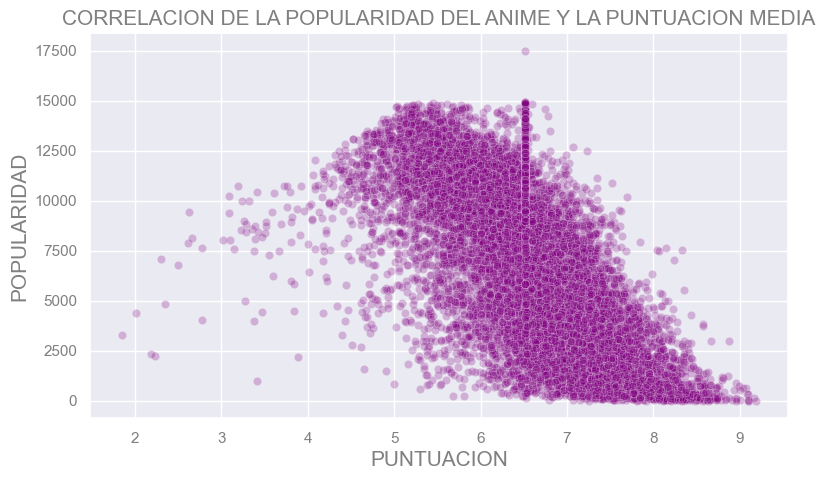

In [877]:
plt.figure(figsize=(9,5))
sns.scatterplot(x="Score", y="Popularity", data=anime_EDA, alpha=0.25, color= "purple")
plt.title("CORRELACION DE LA POPULARIDAD DEL ANIME Y LA PUNTUACION MEDIA", color= "Grey", fontsize= 15)
plt.xlabel("PUNTUACION",color= "Grey", fontsize=15)
plt.ylabel("POPULARIDAD", color= "Grey",fontsize= 15)
plt.tick_params(axis="x", colors="grey")
plt.tick_params(axis="y", colors="grey")

plt.show()

##### ¿Y LA PUNTUACION MEDIA CON ANIMES COMPLETADOS??:

In [878]:
#RELACION ENTRE LA PUNTUACION MEDIA Y LA POPULARIDAD
correlacion= anime_EDA["Completed"].corr(anime_EDA["Score"])
correlacion

0.3717736812964454

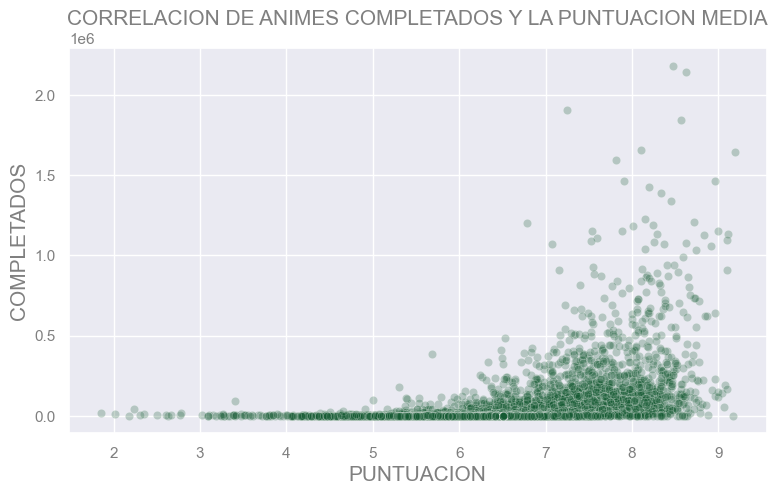

In [879]:
plt.figure(figsize=(9,5))
sns.scatterplot(x="Score", y="Completed", data=anime_EDA, alpha=0.25, color= "#145A32")
plt.title("CORRELACION DE ANIMES COMPLETADOS Y LA PUNTUACION MEDIA", color= "Grey", fontsize= 15)
plt.xlabel("PUNTUACION",color= "Grey", fontsize=15)
plt.ylabel("COMPLETADOS", color= "Grey",fontsize= 15)
plt.tick_params(axis="x", colors="grey")
plt.tick_params(axis="y", colors="grey")

plt.show()

><span style="font-size: 25px; color:#839192">Correlacion positiva moderada. Influye de manera positiva, esto quiere decir que si puntuacion de animes aumenta la cantidad de animes que las personas completan. </span>

#### ANALLISIS MULTIVARIANTE

##### LA RELACION ENTRE FAVORITOS, POPULARIDAD Y ANIMES COMPLETADOS

In [880]:
users= anime_EDA.sort_values(by="Popularity",ascending=False).head(20)

columnas= ["Popularity","Favorites","Completed"]

users.groupby("Type").agg({"Favorites":"mean","Completed":"mean"})

,Favorites,Completed
Type,,
Movie,0.000000,71.200000
Music,4.000000,348.000000
ONA,0.000000,69.666667
OVA,0.333333,49.666667
Special,0.500000,137.000000
TV,0.400000,51.600000


In [881]:
c= users[["Popularity","Favorites","Completed"]].corr()
c

,Popularity,Favorites,Completed
Popularity,1.000000,0.958555,0.938618
Favorites,0.958555,1.000000,0.927925
Completed,0.938618,0.927925,1.000000


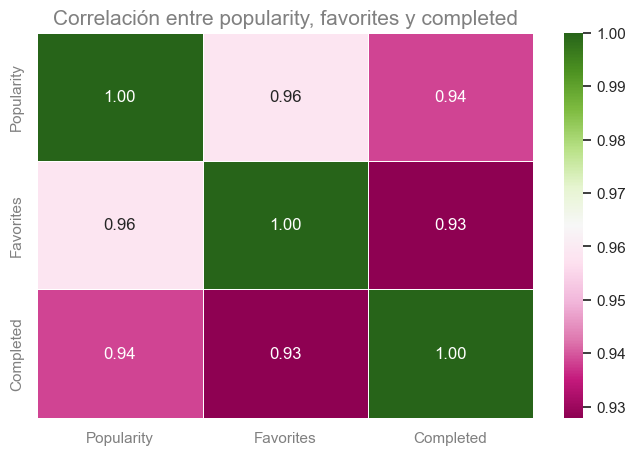

In [882]:
plt.figure(figsize=(8,5))
sns.heatmap(c, annot=True, cmap="PiYG", fmt=".2f", linewidths=.5)
plt.title("Correlación entre popularity, favorites y completed",color= "Grey", fontsize= 15)
plt.tick_params(axis="x", colors="grey")
plt.tick_params(axis="y", colors="grey")

plt.show()

><span style="font-size: 20px; color:#839192">-Hay una correlacion positiva y fuerte entre popularidad y favoritos. cuando la popularidad de un anime aumenta aumenta la cantidad de favoritos </span>
>
><span style="font-size: 20px; color:#839192">-Entre popularidad y completados tambien indica que los animes tenden a tener un mayor numero de usuarios que lo completan </span>
>
><span style="font-size: 20px; color:#839192"> -Entre favoritos y completados hay una correlacion positiva e indica que los animes que son favoritos tienden a ser completados</span>

##### RELACION ENTRE POPULARIDAD, MIEMBROS, ABANDONADOS Y PAUSADOS

In [883]:
users= anime_EDA.sort_values(by="Popularity",ascending=False).head(20)
columnas= ["Popularity","Members", "Dropped","On-Hold"]

users.groupby("Type").agg({"On-Hold":"mean","Dropped":"mean", "Members":"mean"})

,On-Hold,Dropped,Members
Type,,,
Movie,4.400000,44.200000,201.000000
Music,13.000000,19.000000,672.000000
ONA,3.666667,31.666667,200.666667
OVA,5.000000,39.333333,200.333333
Special,1.000000,11.500000,201.000000
TV,5.000000,43.800000,201.000000


In [884]:
cor= users[["Popularity","On-Hold","Members","Dropped"]].corr()
cor

,Popularity,On-Hold,Members,Dropped
Popularity,1.000000,0.875171,0.999841,-0.397935
On-Hold,0.875171,1.000000,0.879599,-0.172789
Members,0.999841,0.879599,1.000000,-0.398890
Dropped,-0.397935,-0.172789,-0.398890,1.000000


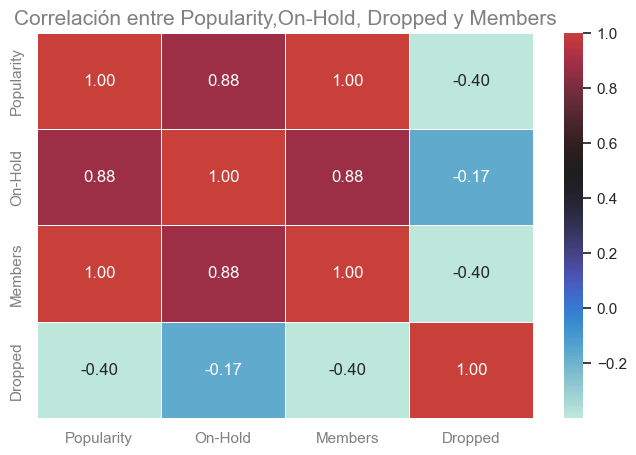

In [885]:
plt.figure(figsize=(8,5))
sns.heatmap(cor, annot=True, center= 0.5, fmt=".2f", linewidths=.5)
plt.title("Correlación entre Popularity,On-Hold, Dropped y Members",color= "Grey", fontsize= 15)
plt.tick_params(axis="x", colors="grey")
plt.tick_params(axis="y", colors="grey")

plt.show()

##### RELACION DE LA POPULARIDAD Y SCORE ENTRE ANIMES DE TIPO TV Y ANIMES DE TIPO PELICULA

In [886]:
tv_anime= anime_EDA[anime_EDA["Type"] =="TV"]
movie_anime= anime_EDA[anime_EDA["Type"]== "Movie"]

In [887]:
# SERIES DE ANIME: CORRELACION DE LA POPULARIDAD Y SCORE
tv_anime["Score"].corr(tv_anime["Popularity"])

-0.5196603545349098

In [888]:
#PELICULAS DE ANIME:CORRELACION DE LA POPULARIDAD Y SCORE
movie_anime["Score"].corr(movie_anime["Popularity"])

-0.6418564158189884

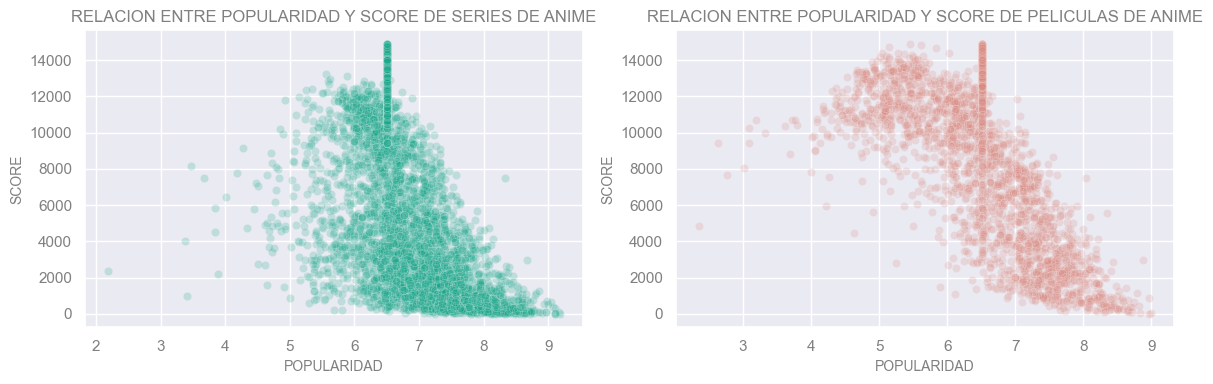

In [889]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.scatterplot(data=tv_anime, x="Score", y="Popularity", color="#17A589", alpha=0.2)
plt.xlabel("POPULARIDAD", color="Grey", fontsize=10)
plt.ylabel("SCORE", color="Grey", fontsize=10)
plt.title("RELACION ENTRE POPULARIDAD Y SCORE DE SERIES DE ANIME", color="Grey", fontsize=12)
plt.tick_params(axis="x", colors="grey")
plt.tick_params(axis="y", colors="grey")

plt.subplot(1, 2, 2)
sns.scatterplot(data=movie_anime, x="Score", y="Popularity", color="#D98880", alpha=0.2)
plt.xlabel("POPULARIDAD", color="Grey", fontsize=10)
plt.ylabel("SCORE", color="Grey", fontsize=10)
plt.title("RELACION ENTRE POPULARIDAD Y SCORE DE PELICULAS DE ANIME", color="Grey", fontsize=12)
plt.tick_params(axis="x", colors="grey")
plt.tick_params(axis="y", colors="grey")

plt.tight_layout()
plt.show()

In [890]:
es=anime_EDA.groupby("Type").agg({"Popularity": ["mean","median"]})

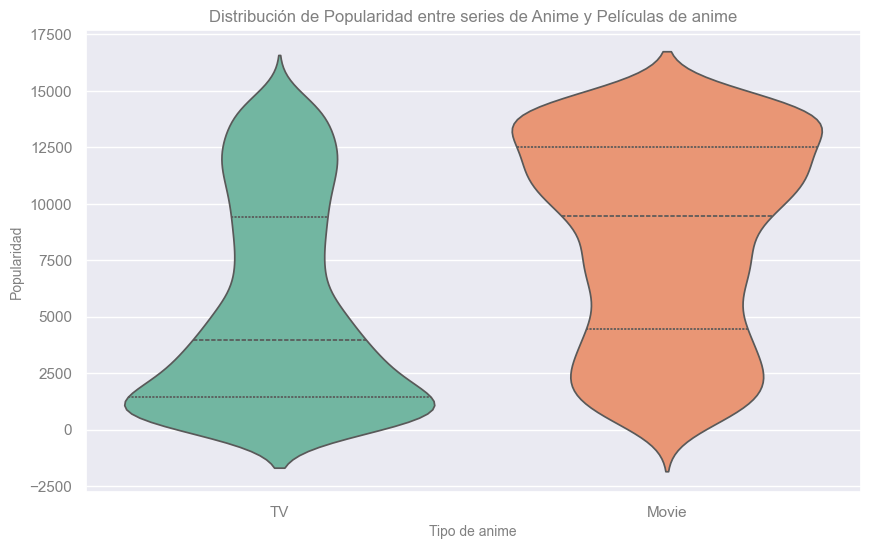

In [891]:
tv_movie = anime_EDA[anime_EDA["Type"].isin(["TV", "Movie"])]

figure, axes = plt.subplots(figsize=(10, 6))
sns.violinplot(x="Type", y="Popularity", hue="Type", data=tv_movie, palette="Set2", inner="quartile", ax=axes, legend=False)
axes.set_xlabel("Tipo de anime", color="Grey", fontsize=10)
axes.set_ylabel("Popularidad", color="Grey", fontsize=10)
axes.set_title("Distribución de Popularidad entre series de Anime y Películas de anime", color="Grey", fontsize=12)
axes.tick_params(axis="x", colors="grey")
axes.tick_params(axis="y", colors="grey")

plt.show()

><span style="font-size: 20px; color:#839192"> Las peliculas de anime tienden a ser mas populares que las series de anime </span>
>
><span style="font-size: 20px; color:#839192">las peliculas tienen una popularidad de 8569 y las series de 5450.22 </span>
>
><span style="font-size: 20px; color:#839192">Mi conclusion es que las peliculas atraen mas a los usuarios y les genera mas interes. </span>

## TEST DE HIPOTESIS

##### 1. ¿Existe relación entre la puntuación media y la popularidad? (correlacion)

**H0**: No hay relacion entre la puntuacion media y la popularidad

**H1**: Hay una relacion entre la puntuacion media y la popularidad

correlacion: -0.5696536246272339
valor p: 0.0
Hay relacion entre puntuacion media y popularidad


<Figure size 1000x1000 with 0 Axes>

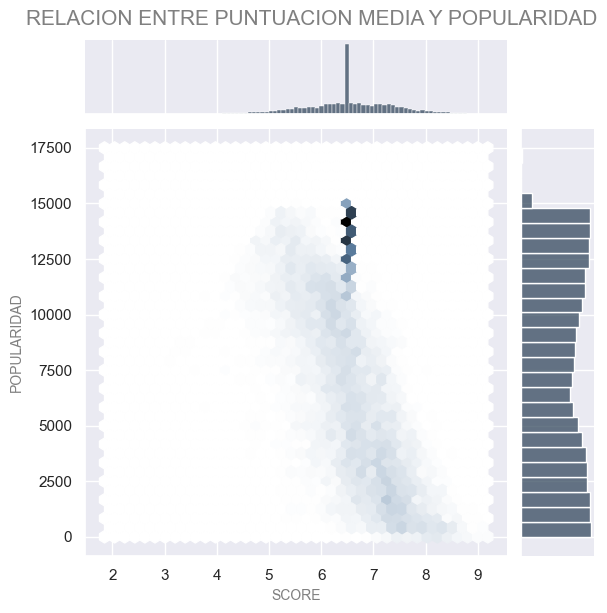

In [892]:
correlacion, valor_p =pearsonr(anime_EDA["Score"], anime_EDA["Popularity"])

print(f"correlacion: {correlacion}")
print(f"valor p: {valor_p}")

nivel_significancia= 0.01

if valor_p< nivel_significancia:
    print("Hay relacion entre puntuacion media y popularidad")
else:
    print("Hipotesis nulam, no hay relacion entre la puntuacion y la popularidad")

#GRAFICA

plt.figure(figsize=(10,10))
sns.jointplot(x="Score", y="Popularity", data=anime_EDA,kind="hex", alpha=1, color="#34495E")
plt.suptitle("RELACION ENTRE PUNTUACION MEDIA Y POPULARIDAD", y=1.02, color="Grey", fontsize=15)
plt.xlabel("SCORE", color="Grey", fontsize=10)
plt.ylabel("POPULARIDAD",color="Grey", fontsize=10)
plt.show()


Correlación: La correlación entre la puntuación media y la popularidad es de aproximadamente -0.57. Esto indica una correlación negativa moderada.

Valor p: El valor p es 0.0, lo que sugiere que la relación observada es estadísticamente significativa. La probabilidad de obtener una correlación tan fuerte (o más fuerte) por pura casualidad es extremadamente baja.

Interpretación de la relación: La correlación negativa indica que, en general, a medida que la puntuación media de un anime disminuye, la popularidad tiende a aumentar, y viceversa. Esta relación es estadísticamente significativa.

><span style="font-size: 20px; color:#839192"> Hay evidencia segun el nivel de significancia que he elegido. Asi que hay evidencia estadistica para afirmar que existe relacion </span>

##### 2. ¿Las puntuaciones se puede ver afectada por la duracion del anime? (analisis de regresion lineal)

**H0**: No hay relación entre la duración del anime y la puntuación media.

**H1**:Hay relación entre la duración del anime y la puntuación media.

                            OLS Regression Results                            
Dep. Variable:                  Score   R-squared:                       0.138
Model:                            OLS   Adj. R-squared:                  0.138
Method:                 Least Squares   F-statistic:                     718.8
Date:                Thu, 14 Dec 2023   Prob (F-statistic):          5.68e-147
Time:                        02:42:50   Log-Likelihood:                -4690.9
No. Observations:                4476   AIC:                             9386.
Df Residuals:                    4474   BIC:                             9399.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
constante      6.1256      0.029    214.563      0.0

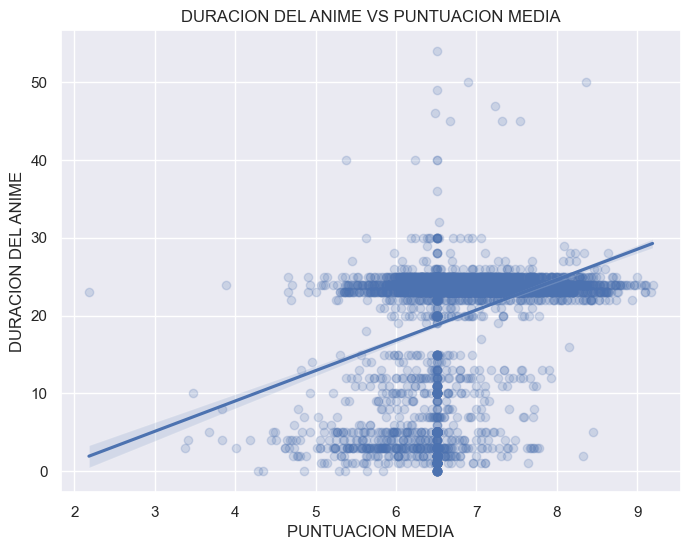

In [893]:
anime_tv= anime_EDA[anime_EDA["Type"]== "TV"].copy()
anime_tv["constante"]=1

x= anime_tv[["constante","Duracion"]]
y= anime_tv["Score"]

reglineal= sm.OLS(y,x).fit()

print(reglineal.summary())

#GRAFICO

plt.figure(figsize=(8,6))
sns.regplot(y="Duracion", x="Score", data=anime_tv, scatter_kws={"alpha":0.2})
plt.title(" LA DURACION DE SERIES DE ANIME VS PUNTUACION MEDIA")
plt.ylabel("DURACION DEL ANIME")
plt.xlabel("PUNTUACION MEDIA")

plt.show()

Hipótesis Nula (H0): La hipótesis nula para el coeficiente de Duracion es que no hay efecto significativo de la duración en la puntuación media. Matemáticamente, esto se expresa como H0: β1 = 0, donde β1 es el coeficiente asociado con Duracion.

Hipótesis Alternativa (H1): La hipótesis alternativa sería que hay un efecto significativo de la duración en la puntuación media. Matemáticamente, esto se expresa como H1: β1 ≠ 0.

En el resumen, el valor p asociado al coeficiente de Duracion es muy pequeño (cercano a cero): Prob (|t|) = 0.000. Dado que este valor p es menor que cualquier nivel común de significancia (por ejemplo, 0.05), rechazaríamos la hipótesis nula y concluimos que hay evidencia significativa para decir que la duración tiene un efecto significativo en la puntuación media.

Conclusión: Hay evidencia significativa para sugerir que la duración del anime (tipo TV) tiene un efecto significativo en la puntuación media

                            OLS Regression Results                            
Dep. Variable:                  Score   R-squared:                       0.354
Model:                            OLS   Adj. R-squared:                  0.354
Method:                 Least Squares   F-statistic:                     1400.
Date:                Thu, 14 Dec 2023   Prob (F-statistic):          1.14e-244
Time:                        02:46:33   Log-Likelihood:                -2862.6
No. Observations:                2552   AIC:                             5729.
Df Residuals:                    2550   BIC:                             5741.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
constante      5.7511      0.025    231.099      0.0

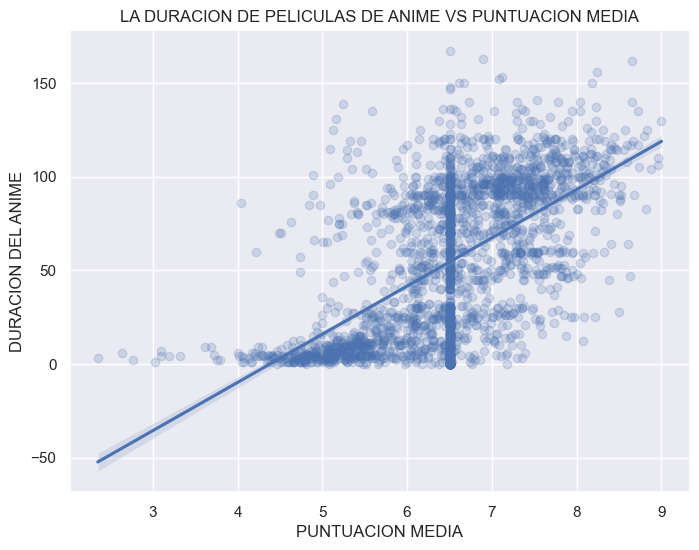

In [896]:
anime_mov= anime_EDA[anime_EDA["Type"]== "Movie"].copy()
anime_mov["constante"]=1

x= anime_mov[["constante","Duracion"]]
y= anime_mov["Score"]

reglineal= sm.OLS(y,x).fit()

print(reglineal.summary())

#GRAFICO

plt.figure(figsize=(8,6))
sns.regplot(y="Duracion", x="Score", data=anime_mov, scatter_kws={"alpha":0.2})
plt.title("LA DURACION DE PELICULAS DE ANIME VS PUNTUACION MEDIA")
plt.ylabel("DURACION DEL ANIME")
plt.xlabel("PUNTUACION MEDIA")

plt.show()

Hipótesis Nula (H0): La hipótesis nula para el coeficiente de Duracion es que no hay efecto significativo de la duración en la puntuación media para las películas. Matemáticamente, esto se expresa como H0: β1 = 0, donde β1 es el coeficiente asociado con Duracion.

Hipótesis Alternativa (H1): La hipótesis alternativa sería que hay un efecto significativo de la duración en la puntuación media para las películas. Matemáticamente, esto se expresa como H1: β1 ≠ 0.

El valor p asociado al coeficiente de Duracion es muy pequeño: Prob (|t|) = 0.000. Dado que este valor p es menor que cualquier nivel común de significancia (por ejemplo, 0.05), rechazaríamos la hipótesis nula y concluimos que hay evidencia significativa para decir que la duración tiene un efecto significativo en la puntuación media para las películas.

Por lo tanto:

Conclusión: Hay evidencia significativa para sugerir que la duración de las películas tiene un efecto significativo en la puntuación media.

##### 3. ¿Las series de anime con combinaciones de múltiples géneros tienden a tener puntuaciones más altas? prueba T o ANOVA

**H0**: Hipótesis Nula (H0): No hay diferencia significativa en las puntuaciones medias entre las series de anime con combinaciones de múltiples géneros y las que no tienen múltiples géneros.

**H1**: Hipótesis Alternativa (H1): Las series de anime con combinaciones de múltiples géneros tienden a tener puntuaciones más altas que las que no tienen múltiples géneros.

##### 4. ¿Los animes estrenados en ciertas estaciones del año pueden tener puntuaciones más altas?

**H0**: 

**H1**: 

Estadística F: 5.867709903047202
Valor p: 0.000533946608356081
Rechazamos la hipótesis nula. Hay diferencias significativas en las puntuaciones entre las estaciones del año.


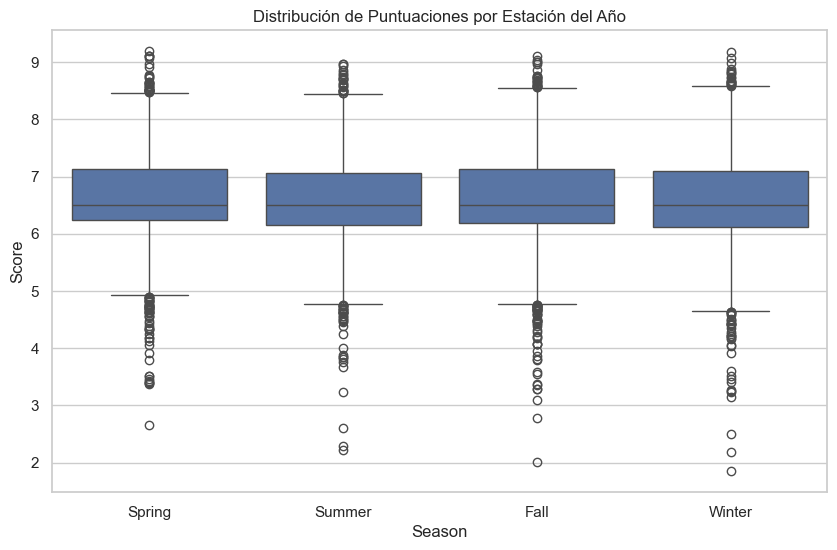

In [1016]:
resultado_anova = stats.f_oneway(
    anime_EDA['Score'][anime_EDA['Season'] == 'Spring'],
    anime_EDA['Score'][anime_EDA['Season'] == 'Summer'],
    anime_EDA['Score'][anime_EDA['Season'] == 'Fall'],
    anime_EDA['Score'][anime_EDA['Season'] == 'Winter']
)

# Imprimir los resultados
print("Estadística F:", resultado_anova.statistic)
print("Valor p:", resultado_anova.pvalue)

# Comparar con el nivel de significancia
nivel_significancia = 0.05
if resultado_anova.pvalue < nivel_significancia:
    print("Rechazamos la hipótesis nula. Hay diferencias significativas en las puntuaciones entre las estaciones del año.")
else:
    print("No hay suficiente evidencia para rechazar la hipótesis nula. No hay diferencias significativas en las puntuaciones entre las estaciones del año.")

plt.figure(figsize=(10, 6))
sns.boxplot(x='Season', y='Score', data=anime_EDA, order=['Spring', 'Summer', 'Fall', 'Winter'])
plt.title('Distribución de Puntuaciones por Estación del Año')
plt.show()

Para realizar un análisis post hoc después de haber rechazado la hipótesis nula en el ANOVA y determinar entre cuáles estaciones hay diferencias significativas, puedes utilizar pruebas de comparaciones múltiples. Una de las pruebas más comunes es la prueba de Tukey.

Estación(es) con Puntuaciones Más Altas: Identifica las estaciones del año que tienen puntuaciones significativamente más altas y comenta sobre posibles razones para estas diferencias.

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
  Fall  Other  -1.0596    0.0 -1.1541 -0.9651   True
  Fall Spring   0.0189 0.8635 -0.0336  0.0713  False
  Fall Summer  -0.0503 0.0928 -0.1054  0.0048  False
  Fall Winter  -0.0452 0.1693 -0.1004  0.0101  False
 Other Spring   1.0785    0.0  0.9846  1.1724   True
 Other Summer   1.0093    0.0   0.914  1.1047   True
 Other Winter   1.0145    0.0   0.919    1.11   True
Spring Summer  -0.0692 0.0043 -0.1231 -0.0152   True
Spring Winter   -0.064 0.0111 -0.1182 -0.0098   True
Summer Winter   0.0051 0.9992 -0.0516  0.0619  False
----------------------------------------------------


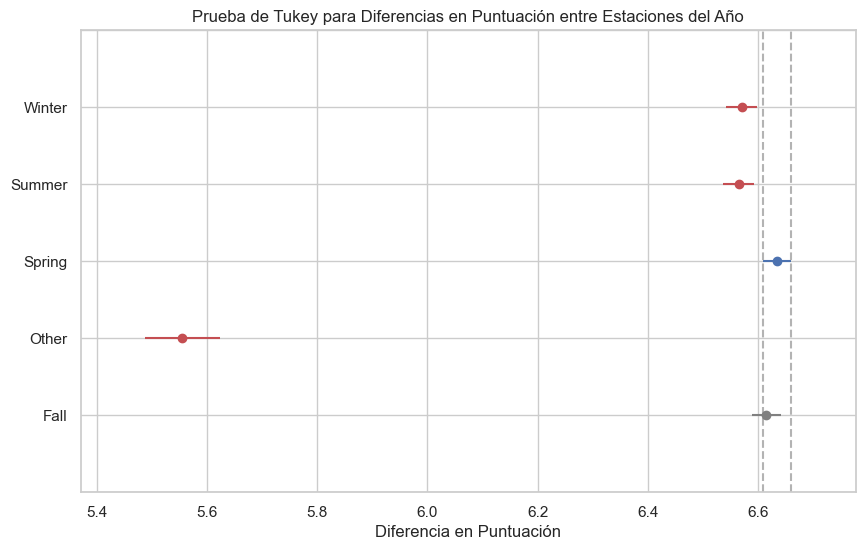

In [1017]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey_result = pairwise_tukeyhsd(anime_EDA['Score'], anime_EDA['Season'])

# Imprimir los resultados
print(tukey_result.summary())

# Visualizar los resultados con un gráfico
tukey_result.plot_simultaneous(comparison_name='Spring', xlabel='Diferencia en Puntuación')
plt.title('Prueba de Tukey para Diferencias en Puntuación entre Estaciones del Año')
plt.show()

##### 5. ¿El número de espectadores que han completado un anime está positivamente correlacionado con su puntuación?

**H0**: 

**H1**: 

Este código realiza un test de correlación de Pearson y evalúa la hipótesis nula sobre la base del valor p. Un valor p menor que el nivel de significancia sugeriría que hay una correlación significativa. Asegúrate de ajustar el código según la estructura de tu conjunto de datos.

In [1025]:
correlation_coefficient, p_value = pearsonr(anime_EDA['Score'], anime_EDA['Completed'])

# Imprimir los resultados
print(f"Coeficiente de Correlación de Pearson: {correlation_coefficient}")
print(f"Valor p: {p_value}")

# Evaluar la hipótesis nula
nivel_significancia = 0.05
if p_value < nivel_significancia:
    print("Rechazamos la hipótesis nula. Hay una correlación significativa.")
else:
    print("No hay suficiente evidencia para rechazar la hipótesis nula. No hay correlación significativa.")





Coeficiente de Correlación de Pearson: 0.37177368129644633
Valor p: 0.0
Rechazamos la hipótesis nula. Hay una correlación significativa.


##### 6. ¿ Que Impacto tiene la duración del anime en la cantidad de personas que lo completan?

**H0**: 

**H1**: 

##### 7. ¿Los animes con clasificaciones de edad más altas pueden tener menor popularidad, ya que restringen al público potencial?

**H0**: 

**H1**: 

## <span style="color:#85929E"> CONCLUSIONES Y REFLEXIONES </span> 